# Exploratory Data Analysis

> Miguel Portela, April 2021


In [1]:
# setwd("C:\\Users\\mangelo.EEG\\Documents\\GitHub\\R_Training\\paneldata")
# setwd("Documents/GitHub/R_Training/paneldata/")

rm(list = ls())

# LOG FILE

# sink("Regression.txt")

# LIBRARIES

library(tidyverse) # Modern data science library 
library(ggplot2)
library(haven)
library(funModeling)
library(Hmisc)

library(stargazer)
library(kableExtra)

library(ExPanDaR)
library(SmartEDA)
library(visdat)
library(naniar)

library(plm)       # Panel data analysis library
library(lfe)
library(fixest)
library(clubSandwich)

library(car)       # Companion to applied regression 
library(gplots)    # Various programing tools for plotting data
library(tseries)   # For timeseries analysis
library(lmtest)    # For hetoroskedasticity analysis

library(dplyr)
library(dlookr)
library(MASS)
library(robustbase)
library(sandwich)
library(broom)


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'funModeling' was built under R version 4.0.5"
Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


funModeling v.1.9.4 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Su

In [2]:
# DATA

setwd('C:\\Users\\mangelo.EEG\\Documents\\GitHub\\BPLIM-Academy\\EDA')

nlswork <- read_dta("nlswork.dta")
attach(nlswork)


In [3]:
# View(world_data)

# names(nlswork)
# head(nlswork)
# str(nlswork)
# dplyr::glimpse(world_data)

dplyr::glimpse(nlswork$ln_wage)

ExpData(nlswork,type=1)
ExpData(nlswork,type=2)


 num [1:28534] 1.45 1.03 1.59 1.78 1.78 ...
 - attr(*, "label")= chr "ln(wage/GNP deflator)"
 - attr(*, "format.stata")= chr "%9.0g"


Descriptions,Value
<chr>,<chr>
Sample size (nrow),28534
No. of variables (ncol),21
No. of numeric/interger variables,21
No. of factor variables,0
No. of text variables,0
No. of logical variables,0
No. of identifier variables,0
No. of date variables,0
No. of zero variance variables (uniform),0


Index,Variable_Name,Variable_Type,Per_of_Missing,No_of_distinct_values
<dbl>,<chr>,<chr>,<dbl>,<int>
1,idcode,numeric,0.00000,4711
2,year,numeric,0.00000,15
3,birth_yr,numeric,0.00000,14
4,age,numeric,0.00084,34
5,race,numeric,0.00000,3
6,msp,numeric,0.00056,3
7,nev_mar,numeric,0.00056,3
8,grade,numeric,0.00007,20
9,collgrad,numeric,0.00000,2


In [4]:
freq(nlswork)

Warning message in freq(nlswork):
"None of the input variables are factor nor character"


NULL

     grade      
 Min.   : 0.00  
 1st Qu.:12.00  
 Median :12.00  
 Mean   :12.53  
 3rd Qu.:14.00  
 Max.   :18.00  
 NA's   :2      

,Vname,Group,TN,nNeg,nZero,nPos,NegInf,PosInf,NA_Value,Per_of_Missing,...,CV,IQR,Skewness,Kurtosis,10%,20%,50%,LB.25%,UB.75%,nOutliers
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,age,All,28534,0,0,28510,0,0,24,0.08,...,0.23,11.00,0.26,-0.91,21.00,23.00,28.00,6.50,50.50,0
3,birth_yr,All,28534,0,0,28534,0,0,0,0.00,...,0.06,5.00,-0.12,-0.99,44.00,45.00,48.00,38.50,58.50,0
5,grade,All,28534,0,21,28511,0,0,2,0.01,...,0.19,2.00,0.10,1.37,10.00,12.00,12.00,9.00,17.00,2125
11,hours,All,28534,0,0,28467,0,0,67,0.23,...,0.27,5.00,-0.90,4.26,20.00,32.00,40.00,27.50,47.50,6100
1,idcode,All,28534,0,0,28534,0,0,0,0.00,...,0.57,2554.00,-0.02,-1.19,518.00,1051.00,2606.00,-2504.00,7712.00,0
6,ind_code,All,28534,0,0,28193,0,0,341,1.20,...,0.39,6.00,0.00,-1.46,4.00,4.00,7.00,-4.00,20.00,0
13,ln_wage,All,28534,0,2,28532,0,0,0,0.00,...,0.29,0.60,0.33,1.67,1.17,1.30,1.64,0.46,2.87,660
7,occ_code,All,28534,0,0,28413,0,0,121,0.42,...,0.64,3.00,1.08,0.68,1.00,3.00,3.00,-1.50,10.50,1846
10,tenure,All,28534,0,1248,26853,0,0,433,1.52,...,1.20,3.67,1.94,3.90,0.17,0.42,1.67,-5.00,9.67,2138


Variable,Valid,Frequency,Percent,CumPercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
race,1,20180,70.72,70.72
race,2,8051,28.22,98.94
race,3,303,1.06,100.00
race,TOTAL,28534,NA,NA
msp,0,11324,39.69,39.69
msp,1,17194,60.26,99.95
msp,NA,16,0.06,100.01
msp,TOTAL,28534,NA,NA
nev_mar,0,21968,76.99,76.99


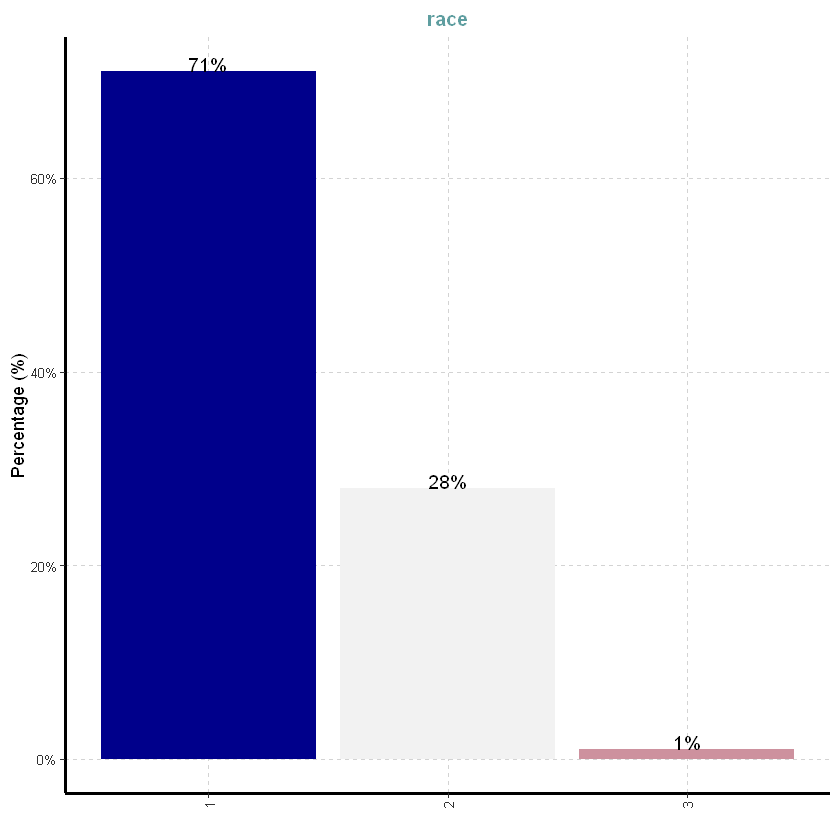

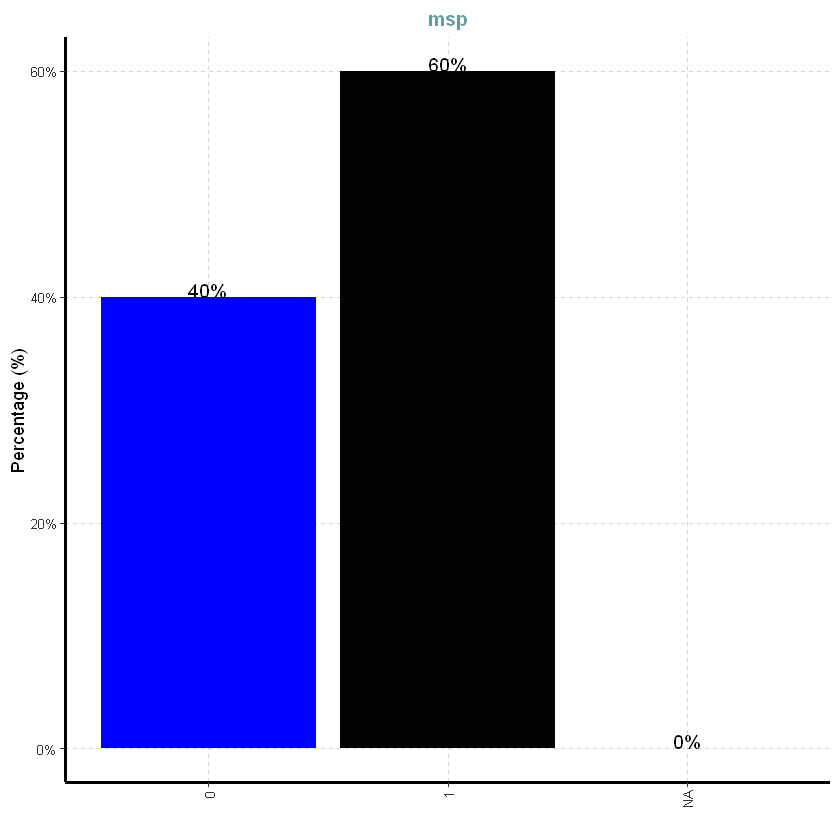

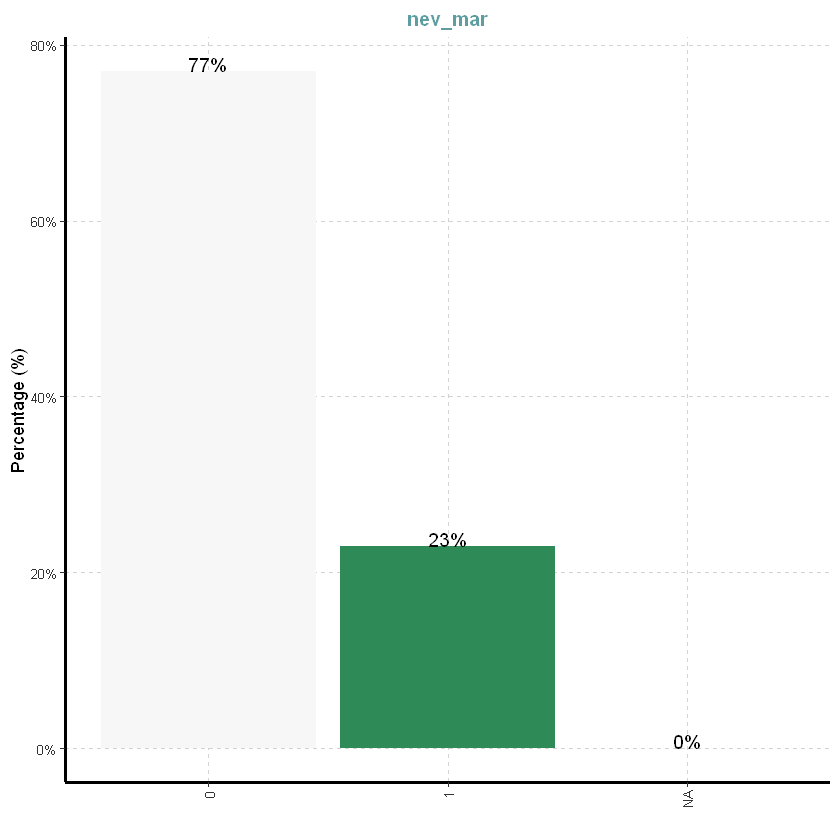

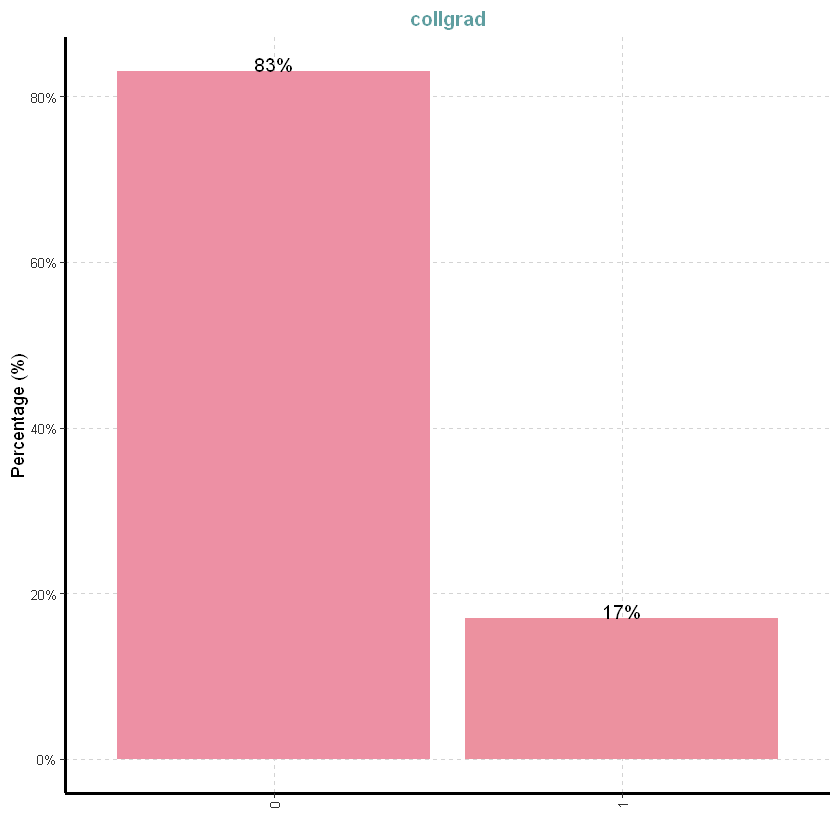

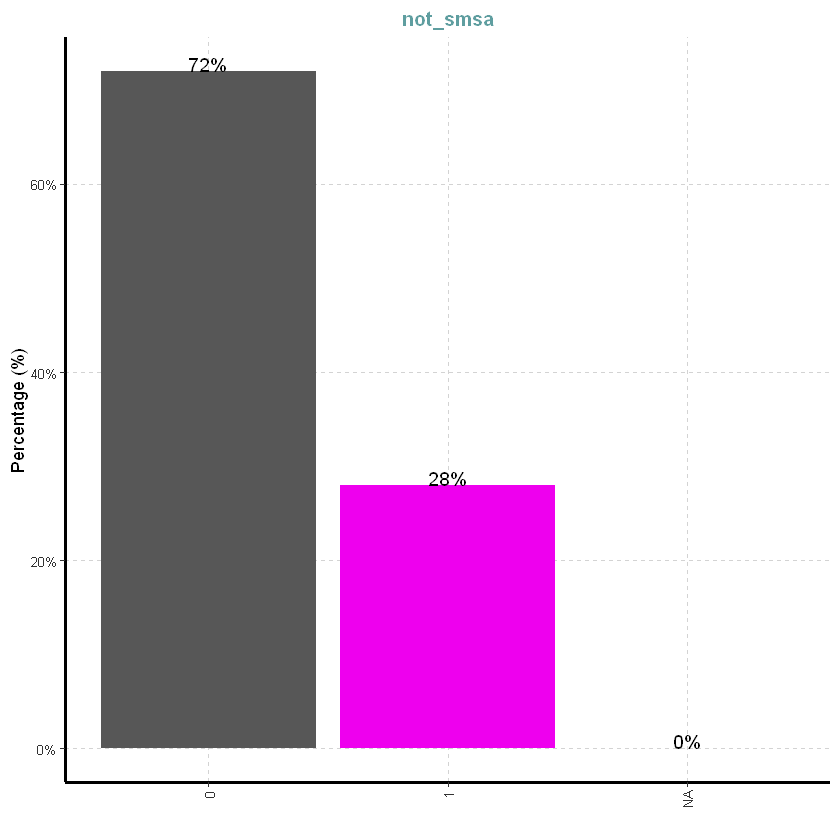

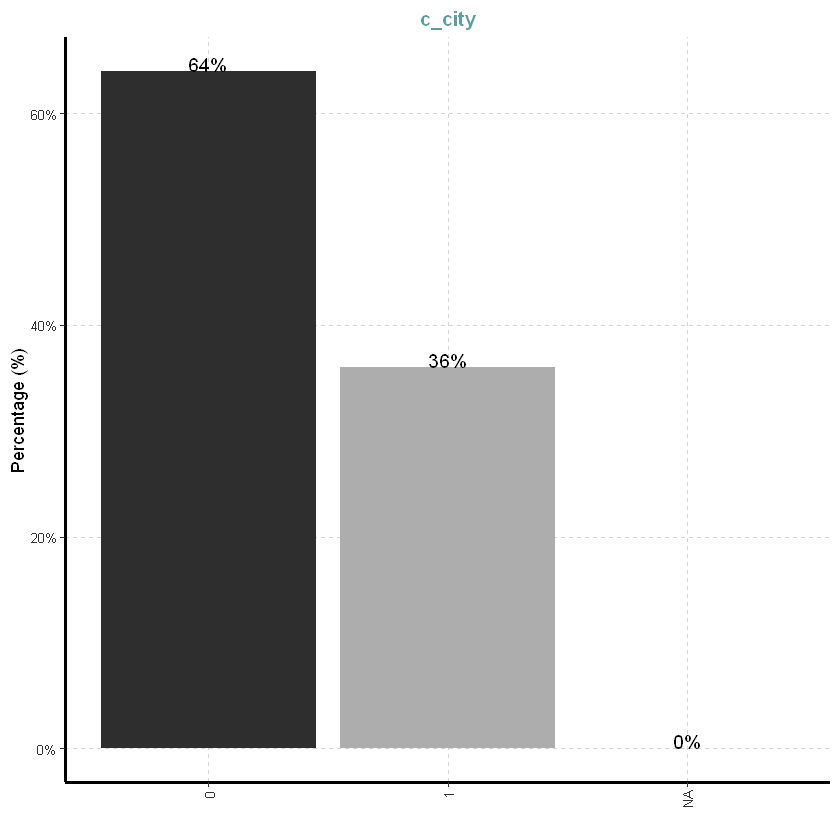

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


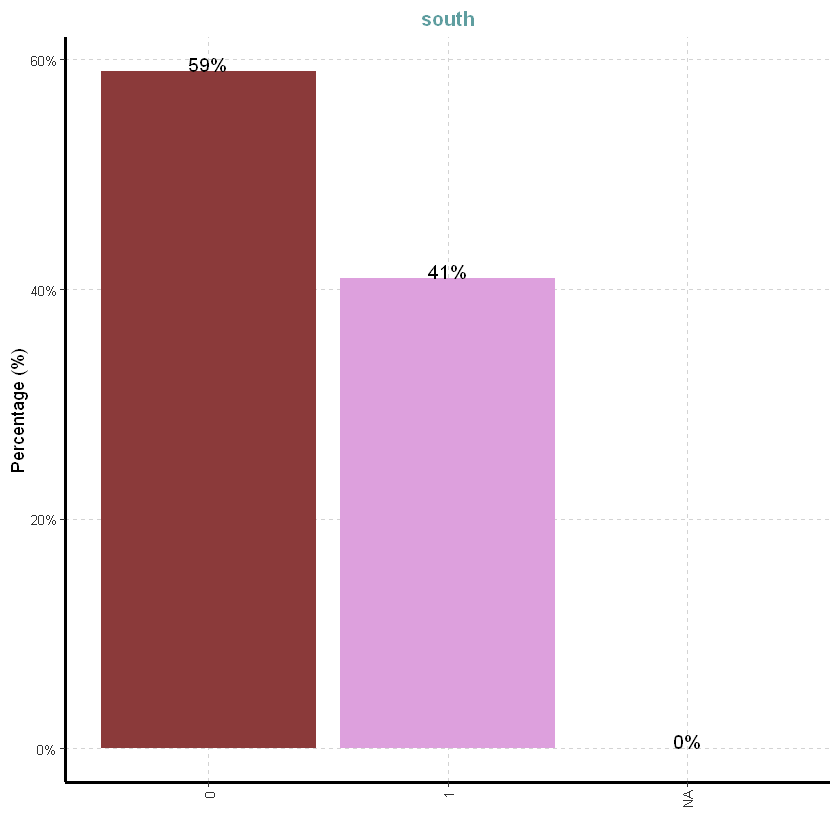

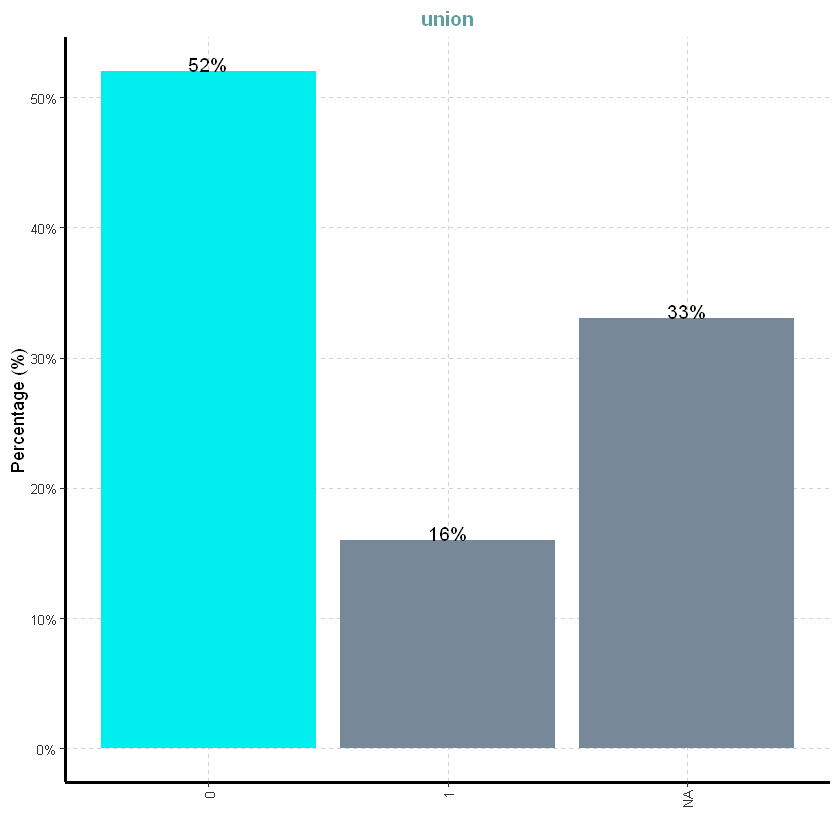

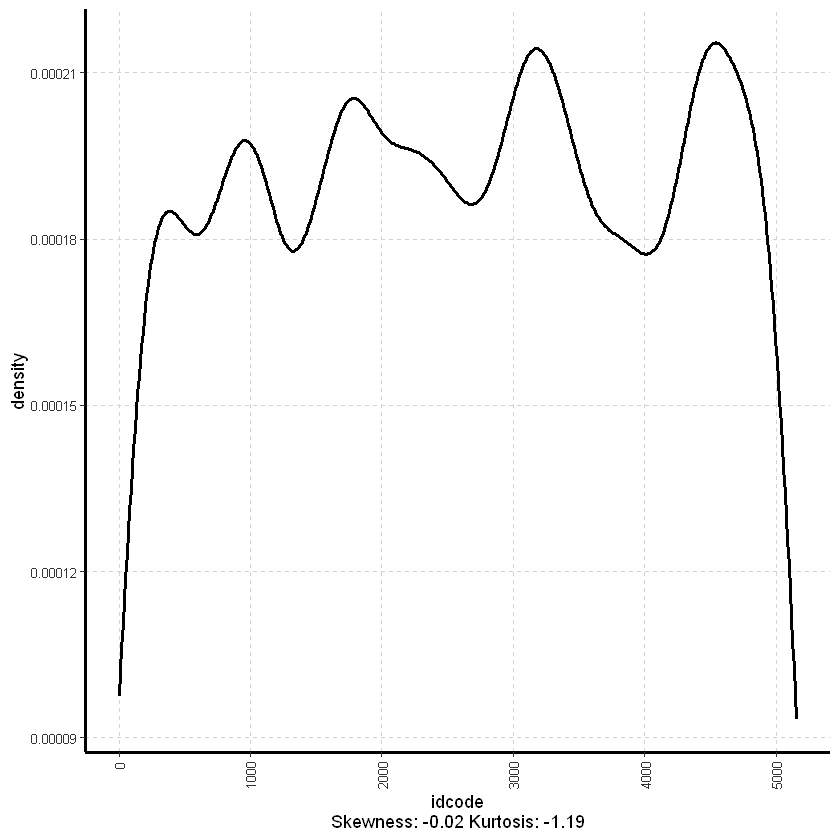

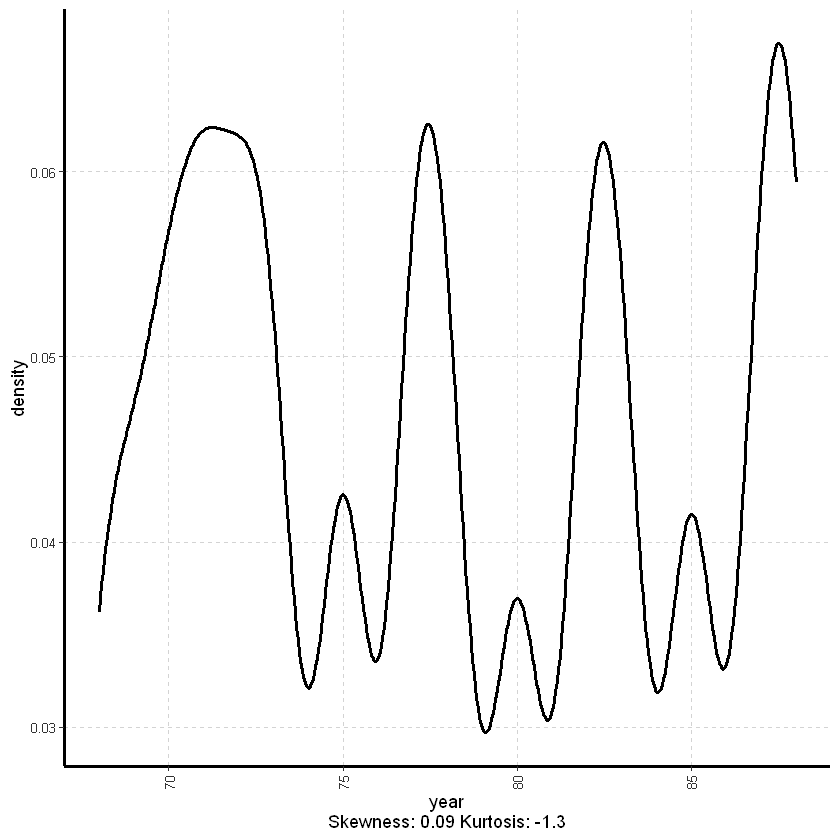

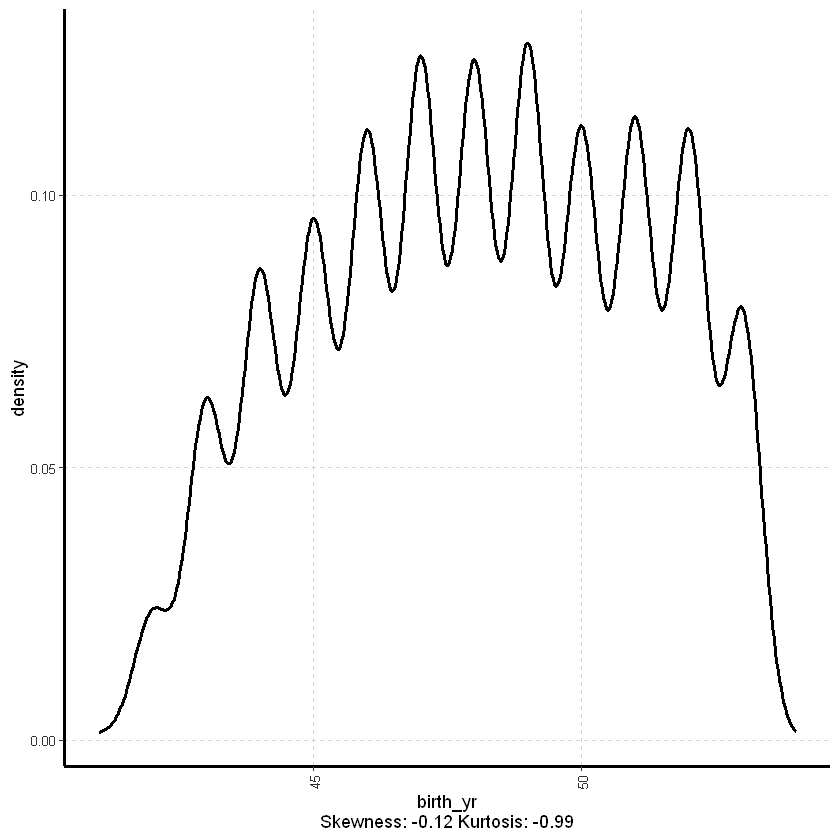

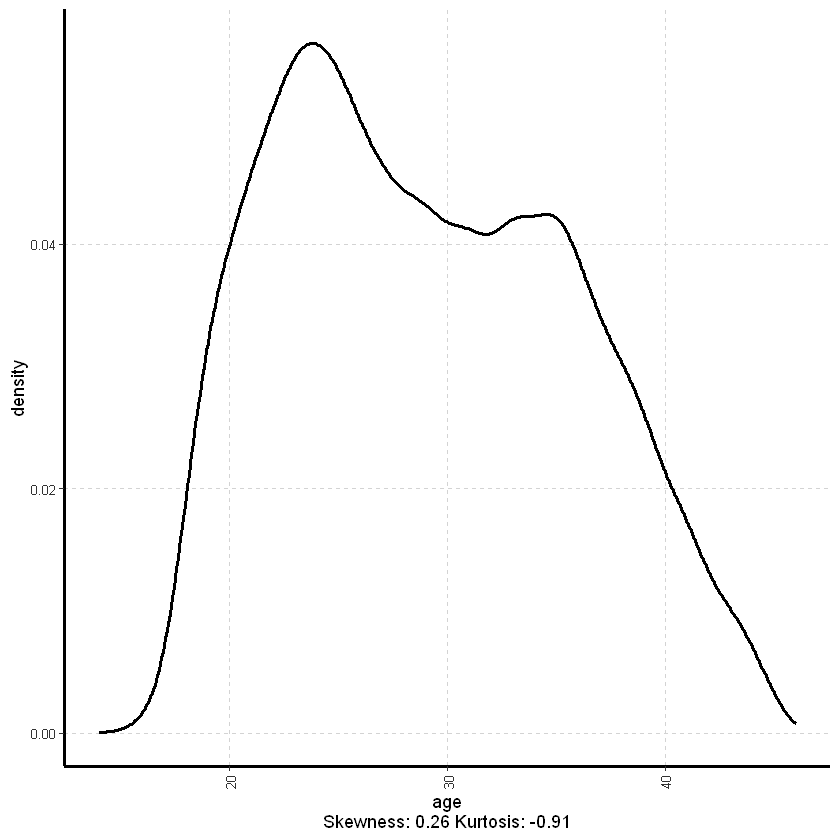

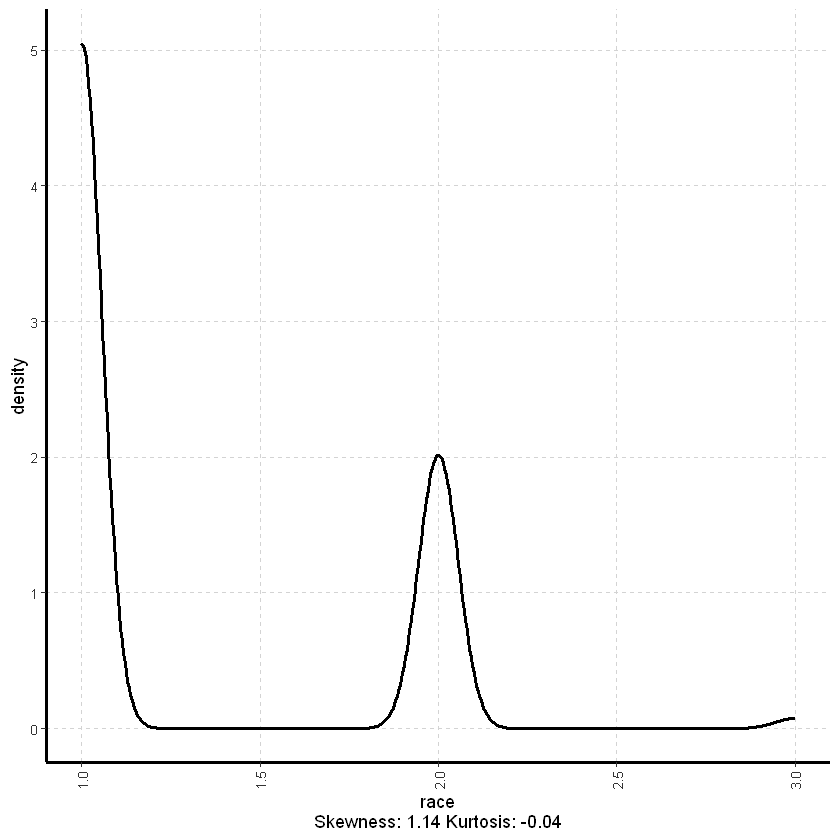

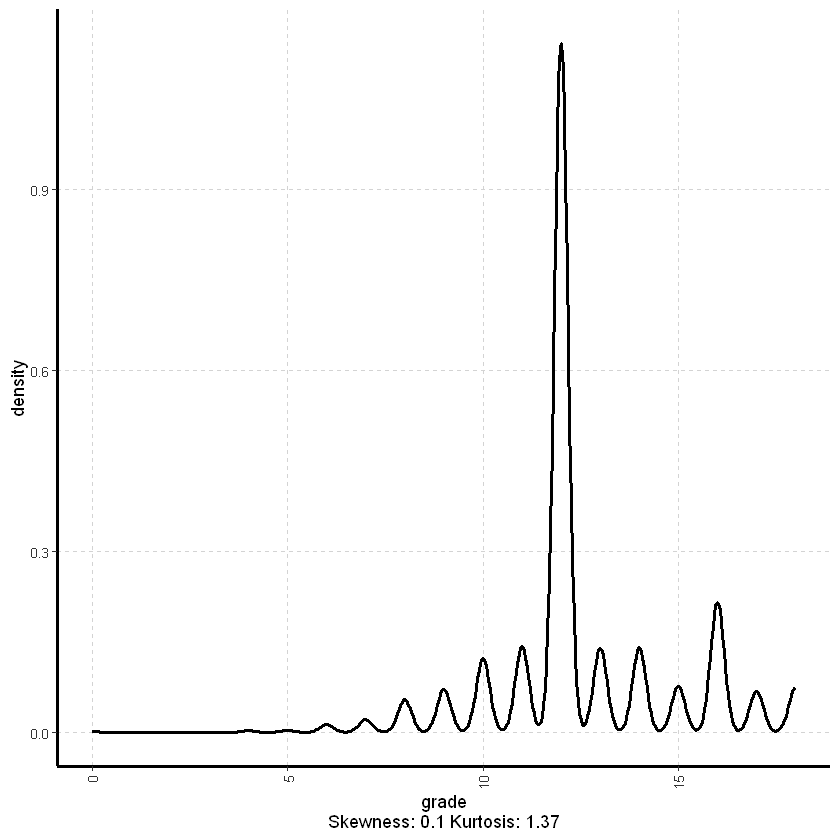

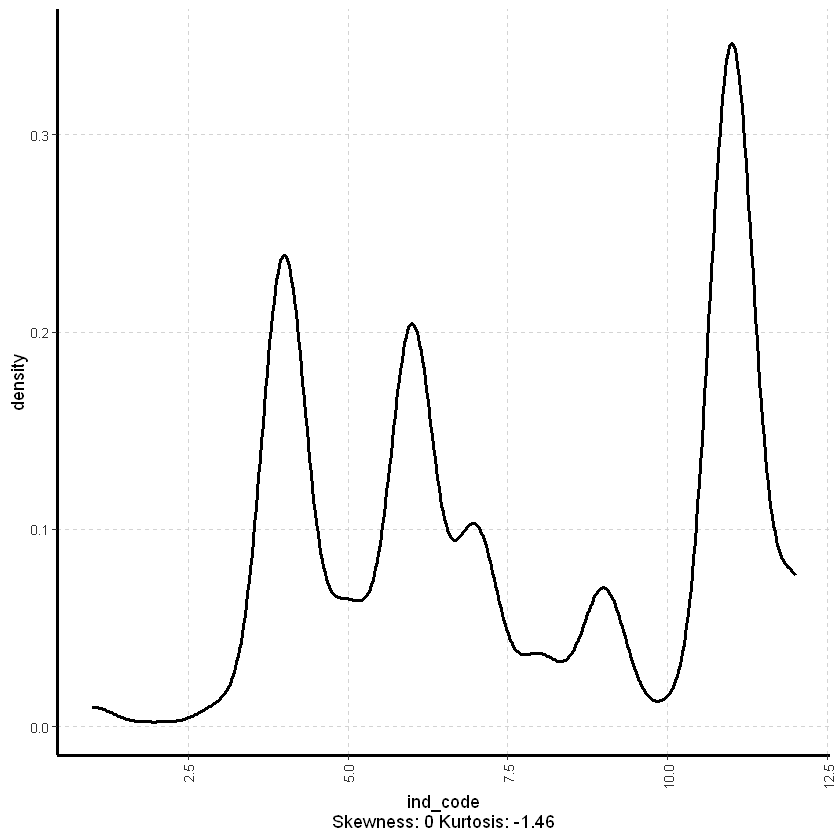

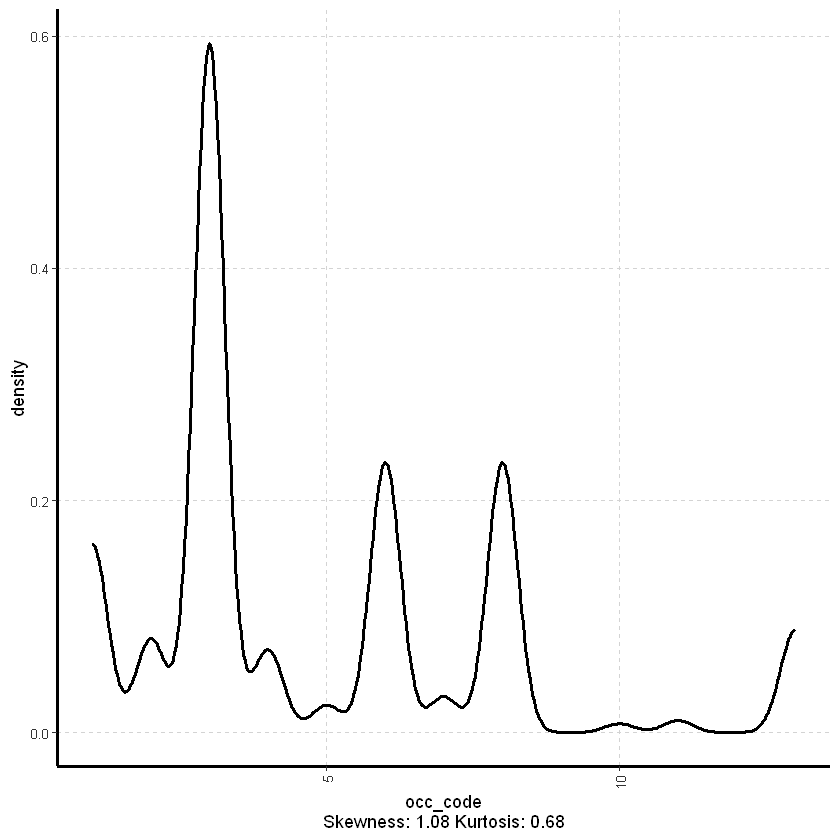

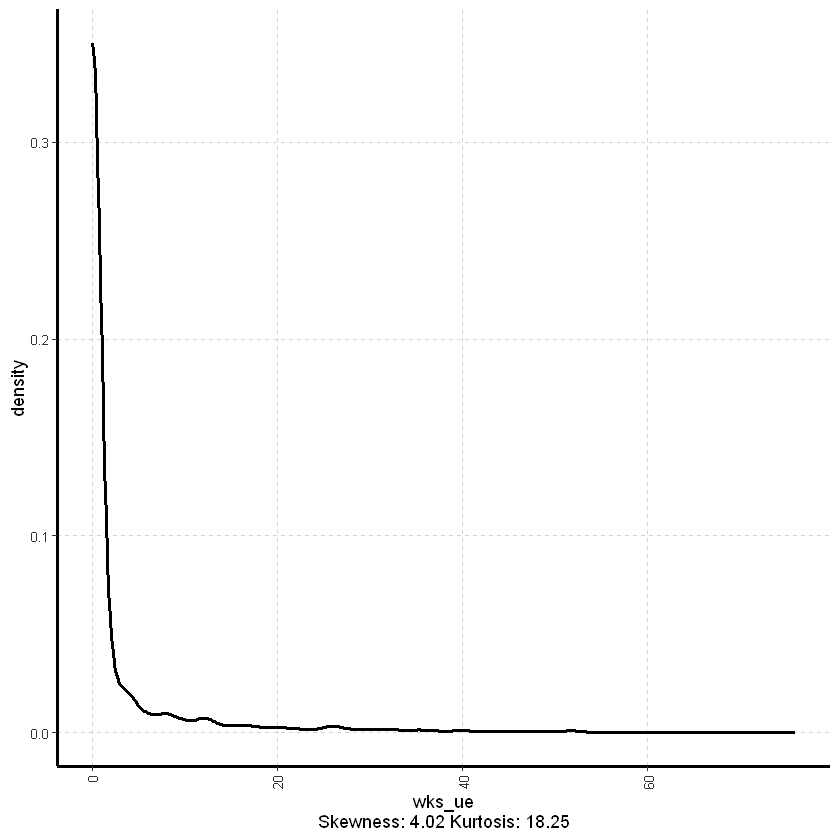

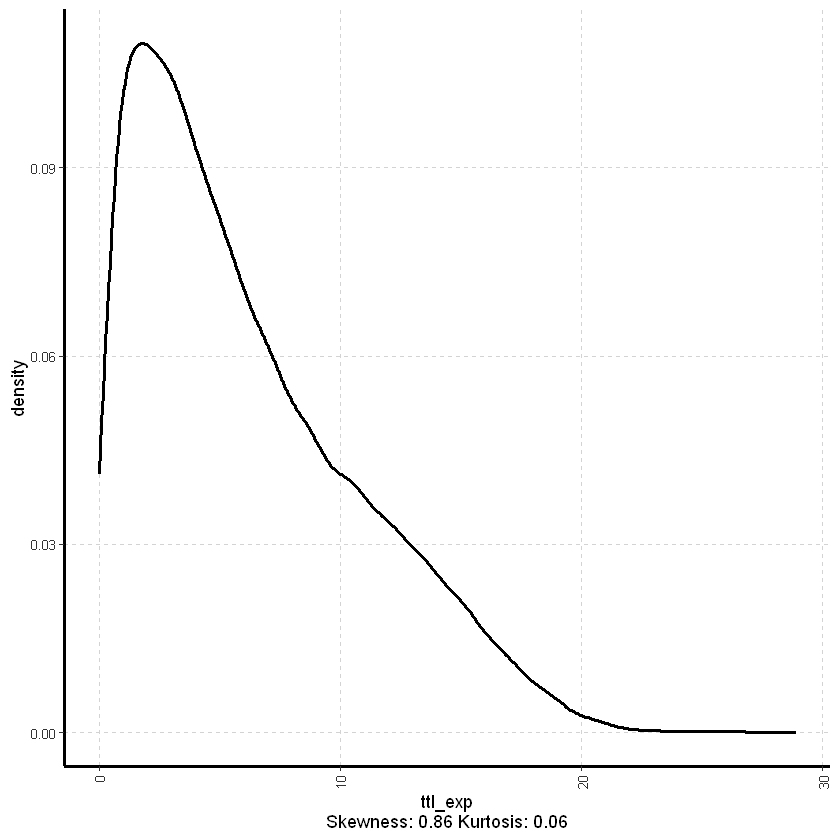

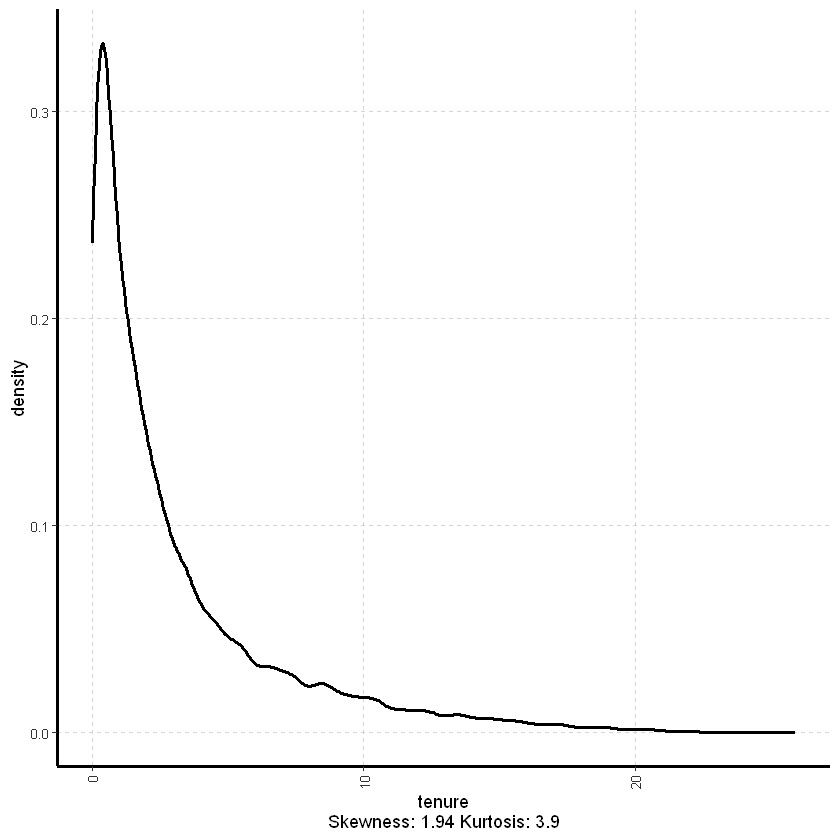

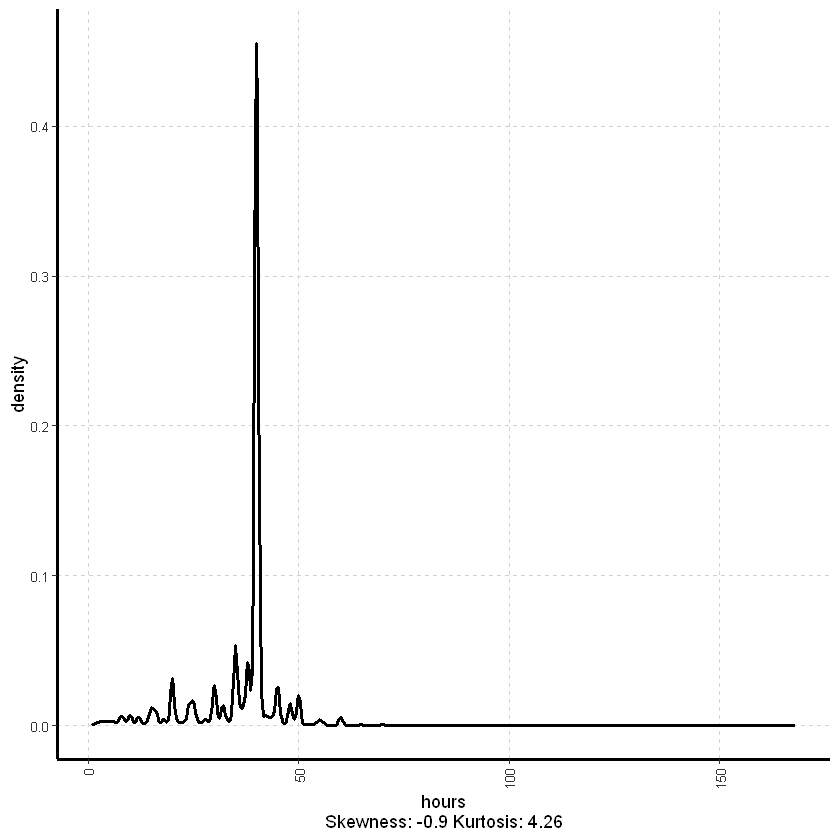

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]


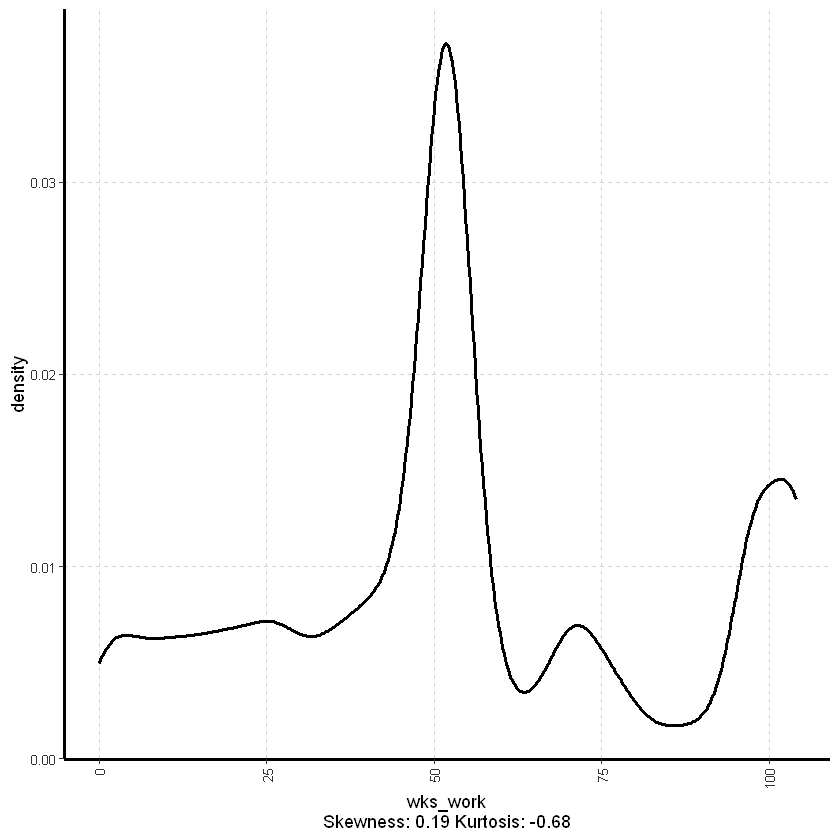

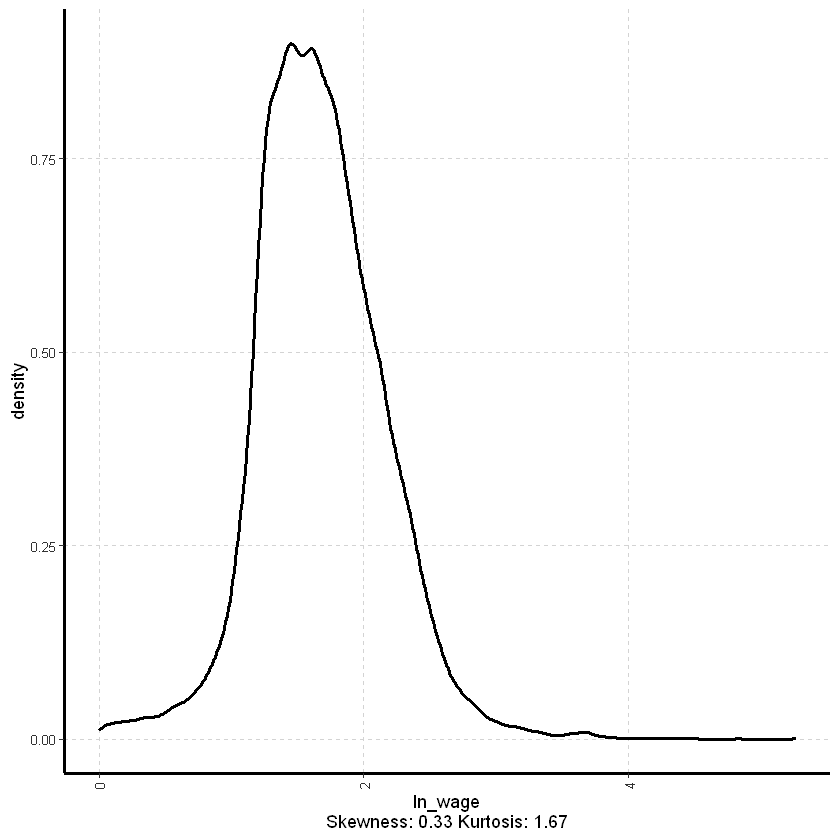

In [5]:
# STATISTICS

## EDA

# eda_report(world_data,output_dir = "EDA/",output_file = "eda_nlswork.pdf")

summary(nlswork[,"grade"])

ExpNumStat(nlswork,by="A",Outlier = TRUE,round=2,Qnt=c(0.1,0.20,0.50))

ExpCTable(nlswork)

ExpCatViz(nlswork)

# ExpNumViz(nlswork,Page=c(6,2))

## TRY IN A 'JUPYTER NOTEBOOK': ExpNumViz(nlswork)

ExpNumViz(nlswork)


In [6]:
ExpOutliers(nlswork,varlist=c("ln_wage"))

Category,ln_wage
<chr>,<chr>
Lower cap : 0.05,0.992751479148865
Upper cap : 0.95,2.45624849796295
Lower bound,0.46
Upper bound,2.87
Num of outliers,658
Lower outlier case,"324,1346,1365,1434,1435,1457,1458,1502,1773,1940,2130,2263,2332,2333,2334,2335,2336,2386,2943,3290,3669,3670,4572,4573,4688,4689,4918,4947,4949,5117,5348,5369,5402,5438,5627,5715,5786,5954,6136,7172,7253,7254,7298,7466,7497,7753,7805,7890,7966,8144,8154,8156,8161,8324,8325,8336,8380,8435,8623,8624,8631,8657,8671,8709,8723,8825,8908,8993,9164,9175,9214,9225,9349,9533,9719,10044,10182,10183,10184,10185,10331,10775,10809,10822,10826,10827,10999,11091,11093,11173,11264,11265,11352,11433,11635,11655,11740,11811,11855,11878,11889,12296,12317,12362,12508,12516,12587,12703,12704,12868,12964,13017,13463,13728,13851,14632,14646,14688,14749,14813,14885,14898,14966,15182,15286,15445,15524,15546,15547,15597,15629,15671,15804,16067,16144,16311,16481,16807,16809,16841,16865,16889,16902,16988,16989,16995,17145,17146,17159,17230,17256,17286,17621,17622,17632,17640,17713,17802,17846,17878,17955,18257,18580,18720,18838,18848,19185,19208,19217,19283,19618,20175,20346,20380,20381,20385,20835,20991,21027,21097,21113,21241,21443,21570,21599,21602,21680,21693,21819,21829,21889,22318,22335,22526,22777,22780,22999,23003,23044,23097,23148,23399,23498,23585,23714,23715,23883,23893,23920,23921,23922,23923,23932,23933,23934,23935,24127,24128,24129,24336,24346,24347,24355,24379,24389,24415,24426,24461,24503,24530,24559,24560,24619,24732,24753,25026,25384,25480,25595,25600,25733,25734,25737,25914,25928,25935,25937,25938,25939,25940,26106,26241,26298,26299,26361,26400,26407,26408,26409,26442,26443,26580,26581,26583,26584,26585,26586,26612,26654,26820,26821,26871,26872,26874,26877,26878,26890,26972,26973,27022,27058,27101,27102,27105,27106,27234,27248,27339,27358,27359,27557,27585,27629,27637,27670,27672,27746,27991,27993,27998,27999,28010,28032,28052,28132,28204,28258,28298,28299,28500"
Upper outlier case,"107,117,290,291,292,293,320,394,395,396,498,616,782,784,970,1300,1306,1320,1321,1322,1323,1522,1623,1702,1703,1704,1724,1934,1935,1936,1990,2071,2072,2073,2139,2346,2402,2468,2548,2808,2937,2938,2940,2941,2942,2946,2948,2990,2995,3122,3123,3126,3183,3185,3186,3187,3324,3325,3332,3408,3435,3436,3438,3487,3656,3667,3676,3681,3701,3784,3863,3864,3865,3866,3867,3885,3886,3888,3889,3890,3891,3998,3999,4076,4095,4133,4158,4159,4601,4603,4604,4605,4606,4648,4874,4875,4876,4877,4878,4904,4905,4919,5227,5439,5544,5629,5656,5657,5658,5659,5814,5815,5975,6006,6029,6097,6189,6190,6191,6192,6531,6608,6609,6744,6745,6746,6747,6748,6751,7081,7220,7270,7479,7480,7614,7728,7855,7856,7857,7858,7859,7974,8309,8430,8911,8912,8913,8915,8943,9012,9339,9388,9580,9770,10143,10144,10145,10146,10147,10148,10149,10257,10338,10411,10487,10716,10781,11002,11003,11004,11008,11147,11261,11262,11263,11480,11536,11621,11833,11952,12319,12358,12392,12411,12412,12413,12414,12524,12555,12910,12955,12974,13016,13172,13200,13320,13394,13480,13551,13552,13553,13554,13837,13838,13954,14015,14104,14106,14110,14128,14139,14190,14285,14302,14303,14310,14454,14581,14939,15248,15249,15251,15350,15715,15795,15796,15797,15798,15802,15810,15832,16001,16107,16109,16111,16188,16833,17135,17368,17369,17370,17371,17963,17976,18345,18346,19409,19410,19411,19413,19414,19415,19502,19742,19743,19794,19812,19912,19913,19998,19999,20034,20035,20057,20122,20123,20157,20308,20344,20591,20592,20593,20594,20595,20596,20597,20598,20713,20716,20963,21117,21289,21361,21362,21451,21668,21752,21840,21866,21867,21868,21902,21959,21974,22035,22151,22207,22315,22320,22433,22566,22631,22649,22653,22809,23020,23303,23734,23752,24610,24668,24669,24670,24671,24672,24724,24744,24944,24976,25070,25391,25392,25393,25557,25712,26012,26144,26191,26223,26379,26425,26426,26427,26430,26431,26433,26552,27042,27043,27060,27800,27801,27802,27837,27848,28429,28432,28472"
Mean before,1.67
Mean after,1.67


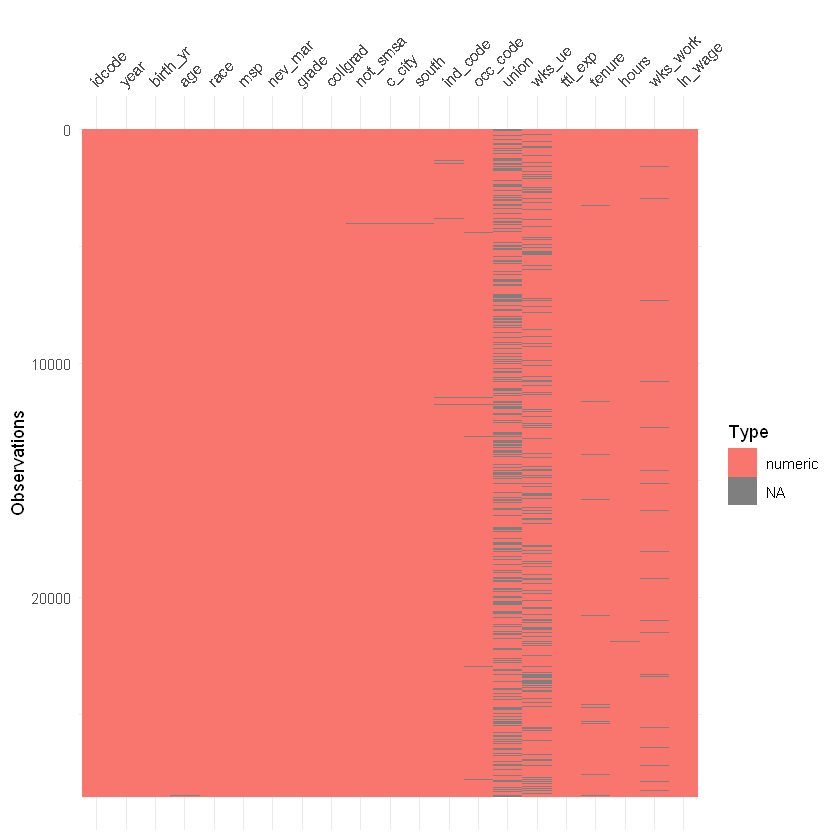

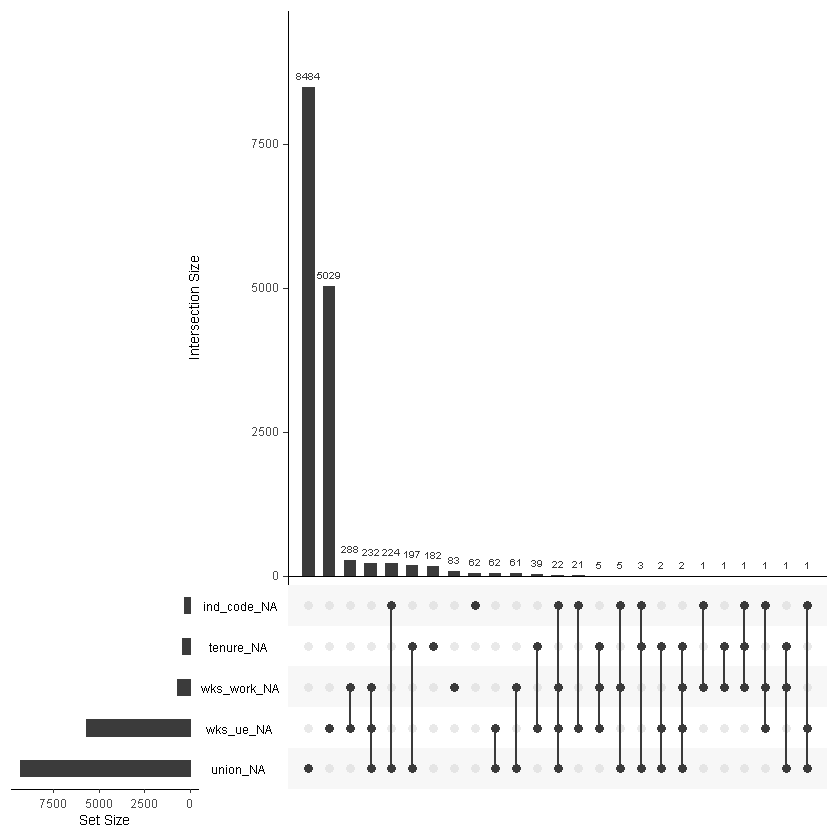

In [7]:
vis_dat(nlswork)

# vis_miss(nlswork) # ALTERNATIVE

gg_miss_upset(nlswork)


In [8]:
## ExPanD(): import the data 'nlswork.dta' and 'ExPanD()' in the Console

In [9]:
summary(nlswork)

stargazer(nlswork,
          title = "Summary statistics",
          label = "tb:statistcis",
          table.placement = "ht",
          header=FALSE)

## or

stargazer(nlswork,
          title = "Summary statistics",
          label = "tb:statistcis",
          table.placement = "ht",
          header=FALSE,type="text")

## or a subset of variables

nlswork %>%
  dplyr::select(ln_wage,grade) %>% 
  stargazer(title="Shorter statistics",
            label="tb:statistics:short",
            table.placement = "ht",
            header=FALSE,
            type="text")


     idcode          year          birth_yr          age             race      
 Min.   :   1   Min.   :68.00   Min.   :41.00   Min.   :14.00   Min.   :1.000  
 1st Qu.:1327   1st Qu.:72.00   1st Qu.:46.00   1st Qu.:23.00   1st Qu.:1.000  
 Median :2606   Median :78.00   Median :48.00   Median :28.00   Median :1.000  
 Mean   :2601   Mean   :77.96   Mean   :48.09   Mean   :29.05   Mean   :1.303  
 3rd Qu.:3881   3rd Qu.:83.00   3rd Qu.:51.00   3rd Qu.:34.00   3rd Qu.:2.000  
 Max.   :5159   Max.   :88.00   Max.   :54.00   Max.   :46.00   Max.   :3.000  
                                                NA's   :24                     
      msp            nev_mar           grade          collgrad    
 Min.   :0.0000   Min.   :0.0000   Min.   : 0.00   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:12.00   1st Qu.:0.000  
 Median :1.0000   Median :0.0000   Median :12.00   Median :0.000  
 Mean   :0.6029   Mean   :0.2297   Mean   :12.53   Mean   :0.168  
 3rd Qu.:1.0000   3rd Qu.


\begin{table}[ht] \centering 
  \caption{Summary statistics} 
  \label{tb:statistcis} 
\begin{tabular}{@{\extracolsep{5pt}}lccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
Statistic & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{St. Dev.} & \multicolumn{1}{c}{Min} & \multicolumn{1}{c}{Pctl(25)} & \multicolumn{1}{c}{Pctl(75)} & \multicolumn{1}{c}{Max} \\ 
\hline \\[-1.8ex] 
idcode & 28,534 & 2,601.284 & 1,487.359 & 1 & 1,327 & 3,881 & 5,159 \\ 
year & 28,534 & 77.959 & 6.384 & 68 & 72 & 83 & 88 \\ 
birth\_yr & 28,534 & 48.085 & 3.013 & 41 & 46 & 51 & 54 \\ 
age & 28,510 & 29.045 & 6.701 & 14.000 & 23.000 & 34.000 & 46.000 \\ 
race & 28,534 & 1.303 & 0.482 & 1 & 1 & 2 & 3 \\ 
msp & 28,518 & 0.603 & 0.489 & 0.000 & 0.000 & 1.000 & 1.000 \\ 
nev\_mar & 28,518 & 0.230 & 0.421 & 0.000 & 0.000 & 0.000 & 1.000 \\ 
grade & 28,532 & 12.533 & 2.324 & 0.000 & 12.000 & 14.000 & 18.000 \\ 
collgrad & 28,534 & 0.168 & 0.374 & 0 & 0 & 0 & 1 \\ 
not\_smsa & 28,526 & 0.282 & 0.4

Descriptions,Value
<chr>,<chr>
Sample size (nrow),19007
No. of variables (ncol),12
No. of numeric/interger variables,12
No. of factor variables,0
No. of text variables,0
No. of logical variables,0
No. of identifier variables,0
No. of date variables,0
No. of zero variance variables (uniform),0


Index,Variable_Name,Variable_Type,Per_of_Missing,No_of_distinct_values
<dbl>,<chr>,<chr>,<dbl>,<int>
1,idcode,numeric,0,4134
2,year,numeric,0,12
3,ln_wage,numeric,0,6658
4,union,numeric,0,2
5,collgrad,numeric,0,2
6,age,numeric,0,31
7,tenure,numeric,0,270
8,not_smsa,numeric,0,2
9,south,numeric,0,2


The following objects are masked from nlswork:

    age, c_city, collgrad, idcode, ln_wage, not_smsa, south, tenure,
    union, year




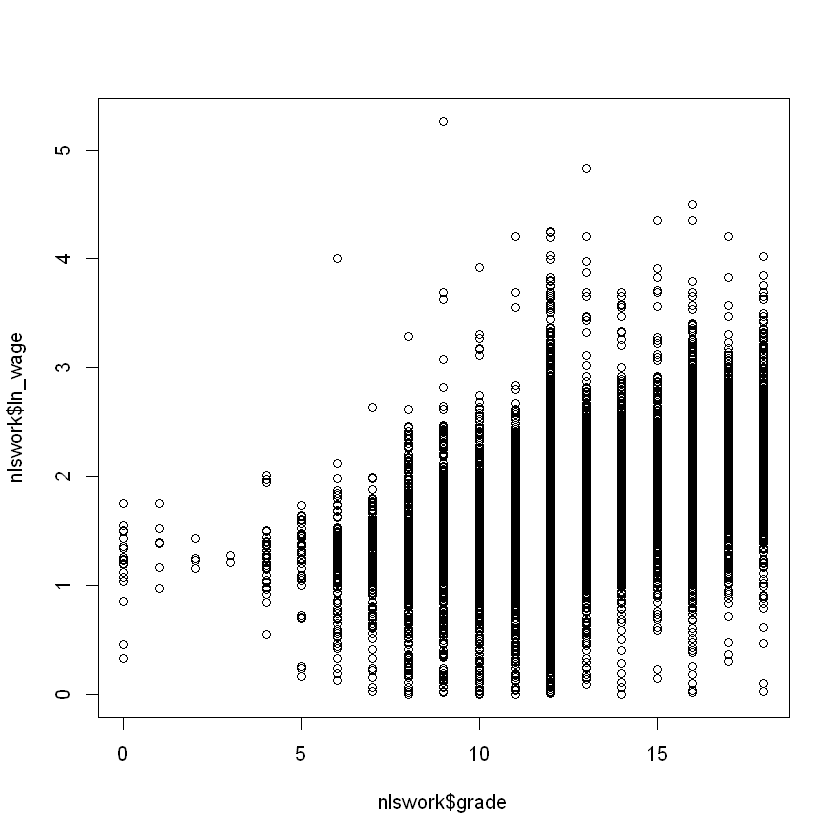

In [10]:
# *drop missing values*

nlswork_clean <-  drop_na(subset(nlswork,select = c(idcode, year, ln_wage, union, collgrad, age, tenure, not_smsa, south, c_city)))

# *Create new variables*

nlswork_clean$agesq <- nlswork_clean$age^2
nlswork_clean$tensq <- nlswork_clean$tenure^2

ExpData(nlswork_clean,type=1)
ExpData(nlswork_clean,type=2)

nlswork_clean <- nlswork_clean[order(idcode,year),]

attach(nlswork_clean)

plot(nlswork$grade,nlswork$ln_wage)

Warning message:
"Removed 2 rows containing missing values (geom_point)."
Saving 6.67 x 6.67 in image

Warning message:
"Removed 2 rows containing missing values (geom_point)."


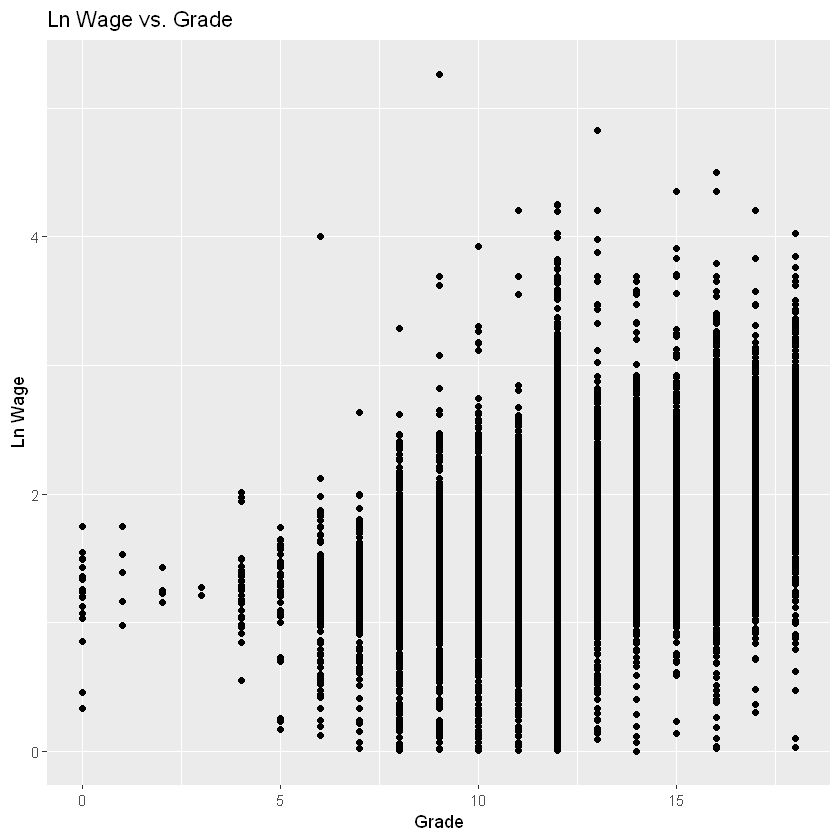

In [11]:
nlswork %>%
  ggplot(aes(grade,ln_wage)) +
  labs(title = "Ln Wage vs. Grade") +
  ylab("Ln Wage") +
  xlab("Grade") +
  geom_point()
  
  ## SAVE YOUR GRAPH

    ggsave("figures/graph1.png")


In [12]:
# REGRESSION ANALYSIS


Call:
lm(formula = ln_wage ~ union + collgrad + age + agesq + tenure + 
    tensq + not_smsa + south + c_city, data = nlswork_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8191 -0.2308 -0.0091  0.2192  3.5048 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.229e+00  6.441e-02  19.074  < 2e-16 ***
union        1.128e-01  6.774e-03  16.649  < 2e-16 ***
collgrad     3.509e-01  7.149e-03  49.092  < 2e-16 ***
age          2.248e-02  4.249e-03   5.292 1.23e-07 ***
agesq       -3.057e-04  6.776e-05  -4.512 6.46e-06 ***
tenure       5.479e-02  1.944e-03  28.187  < 2e-16 ***
tensq       -1.540e-03  1.254e-04 -12.277  < 2e-16 ***
not_smsa    -2.055e-01  7.120e-03 -28.855  < 2e-16 ***
south       -1.406e-01  5.850e-03 -24.032  < 2e-16 ***
c_city      -3.154e-02  6.683e-03  -4.720 2.38e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3854 on 18997 degrees of freedom
Multiple R-squared:  0.3

Pooling Model

Call:
plm(formula = ln_wage ~ union + collgrad + age + agesq + tenure + 
    tensq + not_smsa + south + c_city, data = nlswork_clean, 
    model = "pooling", index = c("idcode", "year"))

Unbalanced Panel: n = 4134, T = 1-12, N = 19007

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-1.8190931 -0.2307618 -0.0090702  0.2192457  3.5048070 

Coefficients:
               Estimate  Std. Error  t-value  Pr(>|t|)    
(Intercept)  1.2286e+00  6.4412e-02  19.0743 < 2.2e-16 ***
union        1.1277e-01  6.7736e-03  16.6490 < 2.2e-16 ***
collgrad     3.5095e-01  7.1488e-03  49.0918 < 2.2e-16 ***
age          2.2481e-02  4.2485e-03   5.2915 1.227e-07 ***
agesq       -3.0573e-04  6.7757e-05  -4.5121 6.458e-06 ***
tenure       5.4787e-02  1.9437e-03  28.1869 < 2.2e-16 ***
tensq       -1.5398e-03  1.2542e-04 -12.2768 < 2.2e-16 ***
not_smsa    -2.0546e-01  7.1204e-03 -28.8549 < 2.2e-16 ***
south       -1.4059e-01  5.8500e-03 -24.0323 < 2.2e-16 ***
c_city      -3.1543e


Regression analysis
                       OLS             panel     
                                      linear     
                       OLS            Pooled     
-------------------------------------------------
Union              0.112774***      0.112774***  
                    (0.006774)      (0.006774)   
Collage Graduate   0.350946***      0.350946***  
                    (0.007149)      (0.007149)   
Age                0.022481***      0.022481***  
                    (0.004249)      (0.004249)   
Age sqrd.          -0.000306***    -0.000306***  
                    (0.000068)      (0.000068)   
Tenure             0.054787***      0.054787***  
                    (0.001944)      (0.001944)   
Tenure sqrd.       -0.001540***    -0.001540***  
                    (0.000125)      (0.000125)   
Not SMSA           -0.205457***    -0.205457***  
                    (0.007120)      (0.007120)   
South              -0.140589***    -0.140589***  
                    (0.005850

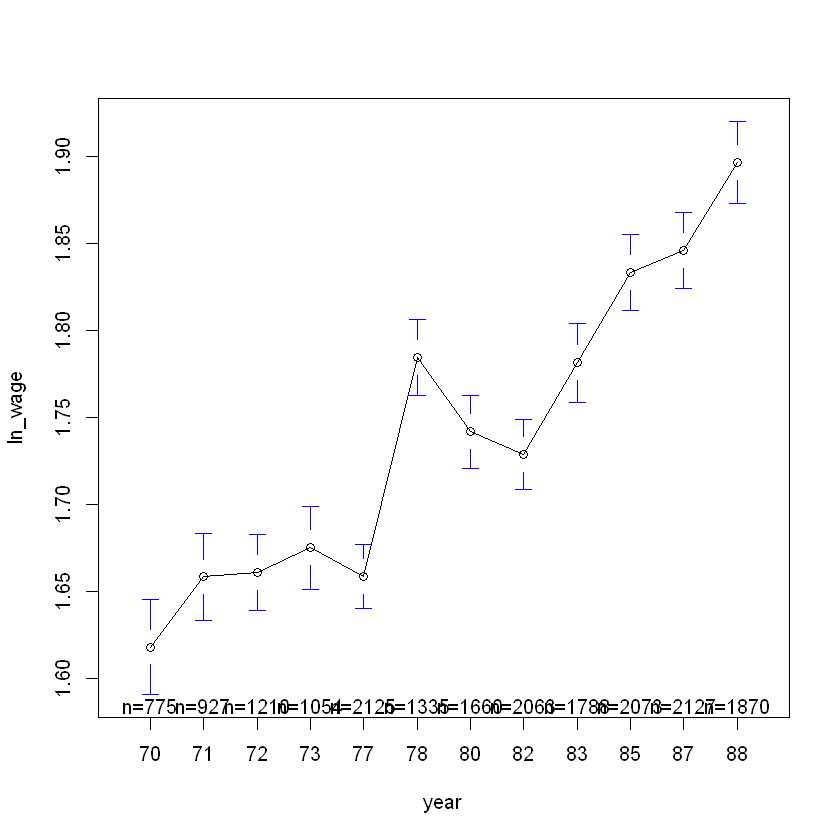

In [13]:
# Exploratory Data Analysis

# coplot(ln_wage ~ year|idcode,type="b",data = nlswork_clean)
# scatterplot(ln_wage ~ year|idcode,data = nlswork_clean)

plotmeans(ln_wage ~ year ,data = nlswork_clean)

# *Estimating a Mincerian Wage Equation*

# *POLS estimator with cluster-robust standard errors*

# *Q1*
# Pooled OLS model

ols <- lm(data = nlswork_clean, ln_wage ~ union +
            collgrad +age +agesq +tenure +tensq +
            not_smsa +south +c_city)
summary(ols)

pols <- plm(data = nlswork_clean, ln_wage ~ union +
              collgrad +age +agesq +tenure +tensq +
              not_smsa +south +c_city, model="pooling", index=c("idcode", "year"))
summary(pols)

stargazer(ols,pols,title = "Regression analysis", 
          model.numbers = FALSE,
          column.labels = c("OLS","Pooled"),
          label = "regressions",
          table.placement = "!ht",
          notes.append = FALSE,
          notes.align="l",
          notes="Standard errors in parentheses.",
          header = FALSE,
          no.space = TRUE,
          covariate.labels = c("Union","Collage Graduate","Age","Age sqrd.","Tenure","Tenure sqrd.","Not SMSA","South","City"),
          omit = c("Constant"),
          omit.stat = c("adj.rsq","f","ser"),
          digits = 6,
          digits.extra = 7,
          omit.yes.no = c("Constant",""),
          dep.var.caption="",
          dep.var.labels.include = FALSE,
          style = "qje",
          type="text")



In [14]:
# CLUSTERED Standard-errors

pols_robust <- coeftest(pols, function(x) vcovHC(x, type = 'sss')) 

stargazer(pols,pols_robust,title = "Regression analysis", 
          model.numbers = FALSE,
          column.labels = c("Pooled","Pooled (cluster)"),
          label = "regressions",
          table.placement = "!ht",
          notes.append = FALSE,
          notes.align="l",
          notes="Standard errors in parentheses.",
          header = FALSE,
          no.space = TRUE,
          covariate.labels = c("Union","Collage graduate","Age","Age sqrd.","Tenure","Tenure sqrd.","Not SMSA","South","City"),
          omit = c("Constant"),
          omit.stat = c("adj.rsq","f","ser"),
          digits = 6,
          digits.extra = 7,
          omit.yes.no = c("Constant",""),
          dep.var.caption="",
          dep.var.labels.include = FALSE,
          style = "qje",
          type="text")

# // Final slide 20
# *Q2*
#   
#   *Random effects estimator (RE)*

# SEE THE DISCUSSION HERE for the comparison between R and Stata
# https://stats.stackexchange.com/questions/421374/different-results-from-random-effects-plm-r-and-xtreg-stata
# R and Stata treat differently unbalanced panels

# for a balanced panel we have

nlswork_balanced <- read_dta("nlswork_balanced.dta")

re_balanced <- plm(data = nlswork_balanced, ln_wage ~ union +
                     collgrad +age +agesq +tenure +tensq +
                     not_smsa +south +c_city, model="random",
                   index=c("idcode", "year"))
summary(re_balanced)

re <- plm(data = nlswork_clean, ln_wage ~ union +
            collgrad +age +agesq +tenure +tensq +
            not_smsa +south +c_city, model="random",
          index=c("idcode", "year"))
summary(re)

re_robust <- coeftest(re, function(x) vcovHC(x, type = 'sss')) 

stargazer(pols,pols_robust,re,re_robust,title = "Regression analysis", 
          model.numbers = FALSE,
          column.labels = c("Pooled","Pooled (cluster)","RE","RE (cluster"),
          label = "regressions",
          table.placement = "!ht",
          notes.append = FALSE,
          notes.align="l",
          notes="Standard errors in parentheses.",
          header = FALSE,
          no.space = TRUE,
          covariate.labels = c("Union","Collage Graduate","Age","Age sqrd.","Tenure","Tenure sqrd.","Not SMSA","South","City"),
          omit = c("Constant"),
          omit.stat = c("adj.rsq","f","ser"),
          digits = 6,
          digits.extra = 7,
          omit.yes.no = c("Constant",""),
          dep.var.caption="",
          dep.var.labels.include = FALSE,
          style = "qje",
          type="text")

# *LM test for the presence of unobserved effects*

plmtest(pols, type=c("bp"))

kable(tidy(plmtest(pols, type=c("bp"))), format = "simple",caption=
        "LM test for the presence of unobserved effects")

# //Final slide 32
# 
# *Q3*
#   
#   *Fixed effects estimator (FE)*

fe <- plm(data = nlswork_clean, ln_wage ~ union +
            collgrad +age +agesq +tenure +tensq +
            not_smsa +south +c_city, model="within", index=c("idcode", "year"))
summary(fe)

stargazer(fe,title = "Regression analysis", 
          model.numbers = FALSE,
          column.labels = c("FE"),
          label = "regressions",
          table.placement = "!ht",
          notes.append = FALSE,
          notes.align="l",
          notes="Standard errors in parentheses.",
          header = FALSE,
          no.space = TRUE,
          covariate.labels = c("Union","Age","Age sqrd.","Tenure","Tenure sqrd.","Not SMSA","South","City"),
          omit = c("Constant"),
          omit.stat = c("adj.rsq","f","ser"),
          digits = 6,
          digits.extra = 7,
          omit.yes.no = c("Constant",""),
          dep.var.caption="",
          dep.var.labels.include = FALSE,
          style = "qje",
          type="text")

# Testing for fixed effects, null: OLS better than fixed
# 'F test for individual effects' <<==>> 'F test that all u_i=0'

ols_0 <- lm(data = nlswork_clean, ln_wage ~ union +
              age +agesq +tenure +tensq +
              not_smsa +south +c_city)
summary(ols_0)

pFtest(fe, ols_0)

# generate fixed-effects

# nlswork_clean$specific_effects <- fixef(fe)

# *Q3.1*

fe_robust <- coeftest(fe, function(x) vcovHC(x, type = 'sss')) 

stargazer(ols_0,fe,fe_robust,title = "Regression analysis", 
          model.numbers = FALSE,
          column.labels = c("OLS","FE","FE (cluster)"),
          label = "regressions",
          table.placement = "!ht",
          notes.append = FALSE,
          notes.align="l",
          notes="Standard errors in parentheses.",
          header = FALSE,
          no.space = TRUE,
          covariate.labels = c("Union","Age","Age sqrd.","Tenure","Tenure sqrd.","Not SMSA","South","City"),
          omit = c("Constant"),
          omit.stat = c("adj.rsq","f","ser"),
          digits = 6,
          digits.extra = 7,
          omit.yes.no = c("Constant",""),
          dep.var.caption="",
          dep.var.labels.include = FALSE,
          style = "qje",
          type="text")

# *Q3.2*

linearHypothesis(ols,c("age=0","agesq=0"))
linearHypothesis(ols,c("age=0","agesq=0"), white.adjust = "hc1")

Wald_test(fe, vcov = "CR1", cluster = idcode, constraints = constrain_zero(c("age","agesq")), test = "Naive-F")


# *LSDV Estimator=FE estimator* <<==>> takes too long
# *using a smaller sample*

nlswork_balanced <- read_dta("nlswork_balanced_small.dta")

LSDV <- lm(data = nlswork_balanced, ln_wage ~ union +
             age +agesq +tenure +tensq +
             not_smsa +south +c_city + factor(idcode))
summary(LSDV)

# //Final slide 35
# 
# *Q4*
#   *Hausman test*

fe_0 <- plm(data = nlswork_clean, ln_wage ~ union +
              collgrad +age +agesq +tenure +tensq +
              not_smsa +south +c_city, model="within", index=c("idcode", "year"))
re_0 <- plm(data = nlswork_clean, ln_wage ~ union +
              collgrad +age +agesq +tenure +tensq +
              not_smsa +south +c_city, model="random", index=c("idcode", "year"))

phtest(fe_0, re_0)    

#   //Final slide 46
# 
# *Q5*
#   *BE estimator

be <- plm(data = nlswork_clean, ln_wage ~ union +
            collgrad +age +agesq +tenure +tensq +
            not_smsa +south +c_city, model="between",
          index=c("idcode", "year"))
summary(be)

# //Final slide 53
# 
# *Q6*
#   *FD estimator*

fd <- plm(data = nlswork_clean, ln_wage ~ 0 + union +
            collgrad +age +agesq +tenure +tensq +
            not_smsa +south +c_city, model="fd",
          index=c("idcode", "year"))
summary(fd)

# *Output Table*

stargazer(pols,re,fe,be,title = "Regression analysis", 
          model.numbers = FALSE,
          column.labels = c("OLS","RE","FE","BE"),
          label = "regressions",
          table.placement = "!ht",
          notes.append = FALSE,
          notes.align="l",
          notes="Standard errors in parentheses.",
          header = FALSE,
          no.space = TRUE,
          omit = c("Constant"),
          omit.stat = c("adj.rsq","f","ser"),
          digits = 6,
          digits.extra = 7,
          omit.yes.no = c("Constant",""),
          dep.var.caption="",
          dep.var.labels.include = FALSE,
          style = "qje",
          type="text")

# *FURTHER SPECIFICATION TESTS FOR PANEL DATA*
#   
#   
#   // # Test for heteroskedasticity within panel data
#   

# takes too long to compute

# bptest(data = nlswork_clean, ln_wage ~ 0 + union +
#          collgrad +age +agesq +tenure +tensq +
#          not_smsa +south +c_city + factor(idcode), studentize=F)

# // # Test of serial correlation within panel data

# Unobserved effects test <<>> Wooldridge's test for unobserved individual effects <<>>

pwtest(data = nlswork_clean, ln_wage ~ union +
         collgrad +age +agesq +tenure +tensq +
         not_smsa +south +c_city)

# Locally robust tests for serial correlation or random effects <<>> Baltagi and Li AR-RE joint test - balanced panel <<>>

pbsytest(data = nlswork_balanced, ln_wage ~ union +
           collgrad +age +agesq +tenure +tensq +
           not_smsa +south +c_city, test="j")
# General serial correlation tests <<>> Breusch-Godfrey/Wooldridge test for serial correlation in panel models <<>>

pbgtest(fe, order = 2)

# Wooldridge's test for serial correlation in FE panels

pwartest(data = nlswork_balanced, ln_wage ~ union +
           collgrad +age +agesq +tenure +tensq +
           not_smsa +south +c_city)

# Wooldridgeâs first-difference-based test

pwfdtest(data = nlswork_balanced, ln_wage ~ union +
           collgrad +age +agesq +tenure +tensq +
           not_smsa +south +c_city)

pwfdtest(data = nlswork_balanced, ln_wage ~ union +
           collgrad +age +agesq +tenure +tensq +
           not_smsa +south +c_city, h0="fe")

# Tests for cross-sectional dependence

pcdtest(data = nlswork_balanced, ln_wage ~ union +
          collgrad +age +agesq +tenure +tensq +
          not_smsa +south +c_city)

# HIGH FIMENSIONAL FIXED-EFFECTS

## CHECK: 'lfe' and 'fixest'
### https://github.com/sgaure/lfe
### https://github.com/lrberge/fixest

# *including 1 fixed effect*

HDFE1a <- feols(data = nlswork_clean, ln_wage ~ union +
                  age +agesq +tenure +tensq +
                  not_smsa +south +c_city | idcode)
summary(HDFE1a)

HDFE1b <- felm(data = nlswork_clean, ln_wage ~ union +
                 age +agesq +tenure +tensq +
                 not_smsa +south +c_city | idcode, clustervar=c("idcode"))
summary(HDFE1b)

# *including a 2nd fixed effect*

HDFE2a <- feols(data = nlswork_clean, ln_wage ~ union +
                  age +agesq +tenure +tensq +
                  not_smsa +south +c_city | idcode + year)
summary(HDFE2a)

HDFE2b <- felm(data = nlswork_clean, ln_wage ~ union +
                 age +agesq +tenure +tensq +
                 not_smsa +south +c_city  | idcode + year, clustervar=c("idcode"))
summary(HDFE2b)

##################################      

# sink()


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Regression analysis
                      panel        coefficient   
                     linear            test      
                     Pooled      Pooled (cluster)
-------------------------------------------------
Union              0.112774***     0.112774***   
                   (0.006774)       (0.011731)   
Collage graduate   0.350946***     0.350946***   
                   (0.007149)       (0.014112)   
Age                0.022481***     0.022481***   
                   (0.004249)       (0.005373)   
Age sqrd.         -0.000306***     -0.000306***  
                   (0.000068)       (0.000088)   
Tenure             0.054787***     0.054787***   
                   (0.001944)       (0.002743)   
Tenure sqrd.      -0.001540***     -0.001540***  
                   (0.000125)       (0.000180)   
Not SMSA          -0.205457***     -0.205457***  
                   (0.007120)       (0.013137)   
South             -0.140589***     -0.140589***  
                   (0.005850)

Warning message in Ops.pseries(y, bX):
"indexes of pseries have same length but not same content: result was assigned first operand's index"
Warning message in Ops.pseries(y, bX):
"indexes of pseries have same length but not same content: result was assigned first operand's index"
Warning message in Ops.pseries(y, bX):
"indexes of pseries have same length but not same content: result was assigned first operand's index"


Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = ln_wage ~ union + collgrad + age + agesq + tenure + 
    tensq + not_smsa + south + c_city, data = nlswork_balanced, 
    model = "random", index = c("idcode", "year"))

Balanced Panel: n = 53, T = 12, N = 636

Effects:
                  var std.dev share
idiosyncratic 0.03698 0.19230 0.319
individual    0.07902 0.28110 0.681
theta: 0.8063

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-0.904519 -0.104813  0.015673  0.114854  0.658580 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)  1.05650211  0.20514289  5.1501 2.604e-07 ***
union        0.06087668  0.02949229  2.0642 0.0390030 *  
collgrad     0.20128253  0.17651938  1.1403 0.2541673    
age          0.04592525  0.01334703  3.4409 0.0005799 ***
agesq       -0.00051693  0.00020986 -2.4632 0.0137701 *  
tenure       0.00332254  0.00616575  0.5389 0.5899766    
tensq        0.00011

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = ln_wage ~ union + collgrad + age + agesq + tenure + 
    tensq + not_smsa + south + c_city, data = nlswork_clean, 
    model = "random", index = c("idcode", "year"))

Unbalanced Panel: n = 4134, T = 1-12, N = 19007

Effects:
                  var std.dev share
idiosyncratic 0.06476 0.25448 0.444
individual    0.08108 0.28475 0.556
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3336  0.5920  0.6572  0.6406  0.6987  0.7502 

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.77886 -0.13081  0.00854  0.00428  0.14314  3.03289 

Coefficients:
               Estimate  Std. Error  z-value  Pr(>|z|)    
(Intercept)  1.1369e+00  5.0729e-02  22.4103 < 2.2e-16 ***
union        1.0368e-01  6.4468e-03  16.0819 < 2.2e-16 ***
collgrad     3.6931e-01  1.2344e-02  29.9171 < 2.2e-16 ***
age          2.3031e-02  3.3174e-03   6.9424 3.856e-12 ***
agesq       -2.4910e-04  5.


Regression analysis
                    panel       coefficient       panel     coefficient 
                    linear          test          linear        test    
                    Pooled    Pooled (cluster)      RE      RE (cluster 
------------------------------------------------------------------------
Union            0.112774***    0.112774***    0.103677***  0.103677*** 
                  (0.006774)     (0.011731)     (0.006447)   (0.008581) 
Collage Graduate 0.350946***    0.350946***    0.369309***  0.369309*** 
                  (0.007149)     (0.014112)     (0.012344)   (0.013160) 
Age              0.022481***    0.022481***    0.023031***  0.023031*** 
                  (0.004249)     (0.005373)     (0.003317)   (0.004653) 
Age sqrd.        -0.000306***   -0.000306***   -0.000249*** -0.000249***
                  (0.000068)     (0.000088)     (0.000053)   (0.000076) 
Tenure           0.054787***    0.054787***    0.040771***  0.040771*** 
                  (0.001944)  


	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  ln_wage ~ union + collgrad + age + agesq + tenure + tensq + not_smsa +  ...
chisq = 14041, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects




Table: LM test for the presence of unobserved effects

 statistic   p.value   parameter  method                                                              alternative         
----------  --------  ----------  ------------------------------------------------------------------  --------------------
  14041.19         0           1  Lagrange Multiplier Test -  (Breusch-Pagan) for unbalanced panels   significant effects 

Oneway (individual) effect Within Model

Call:
plm(formula = ln_wage ~ union + collgrad + age + agesq + tenure + 
    tensq + not_smsa + south + c_city, data = nlswork_clean, 
    model = "within", index = c("idcode", "year"))

Unbalanced Panel: n = 4134, T = 1-12, N = 19007

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-1.88027 -0.10216  0.00000  0.10774  2.80710 

Coefficients:
            Estimate  Std. Error  t-value  Pr(>|t|)    
union     9.3877e-02  6.9662e-03  13.4761 < 2.2e-16 ***
age       2.4259e-02  3.4467e-03   7.0383 2.031e-12 ***
agesq    -2.2618e-04  5.5316e-05  -4.0890 4.356e-05 ***
tenure    3.2966e-02  1.6465e-03  20.0218 < 2.2e-16 ***
tensq    -1.1002e-03  1.0291e-04 -10.6916 < 2.2e-16 ***
not_smsa -9.3105e-02  1.2970e-02  -7.1787 7.372e-13 ***
south    -6.3222e-02  1.3279e-02  -4.7611 1.944e-06 ***
c_city    1.1409e-02  8.8964e-03   1.2824    0.1997    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    1119.5
R


Regression analysis
                           FE               
Union                  0.093877***          
                       (0.006966)           
Age                    0.024259***          
                       (0.003447)           
Age sqrd.             -0.000226***          
                       (0.000055)           
Tenure                 0.032966***          
                       (0.001646)           
Tenure sqrd.          -0.001100***          
                       (0.000103)           
Not SMSA              -0.093105***          
                       (0.012970)           
South                 -0.063222***          
                       (0.013279)           
City                    0.011409            
                       (0.008896)           
N                        19,007             
R2                      0.140054            
Notes:       Standard errors in parentheses.



Call:
lm(formula = ln_wage ~ union + age + agesq + tenure + tensq + 
    not_smsa + south + c_city, data = nlswork_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7497 -0.2508 -0.0182  0.2379  3.4100 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.008e+00  6.821e-02  14.776  < 2e-16 ***
union        1.294e-01  7.181e-03  18.026  < 2e-16 ***
age          3.929e-02  4.495e-03   8.740  < 2e-16 ***
agesq       -5.387e-04  7.175e-05  -7.509 6.24e-14 ***
tenure       5.806e-02  2.062e-03  28.158  < 2e-16 ***
tensq       -1.699e-03  1.331e-04 -12.765  < 2e-16 ***
not_smsa    -2.311e-01  7.538e-03 -30.657  < 2e-16 ***
south       -1.475e-01  6.208e-03 -23.762  < 2e-16 ***
c_city      -3.451e-02  7.094e-03  -4.864 1.16e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4091 on 18998 degrees of freedom
Multiple R-squared:  0.2331,	Adjusted R-squared:  0.2328 
F-statistic: 721.9 on 8 and 1899


	F test for individual effects

data:  ln_wage ~ union + collgrad + age + agesq + tenure + tensq + not_smsa +  ...
F = 8.2833, df1 = 4133, df2 = 14865, p-value < 2.2e-16
alternative hypothesis: significant effects



Regression analysis
                 OLS         panel     coefficient 
                             linear        test    
                 OLS           FE      FE (cluster)
---------------------------------------------------
Union        0.129446***  0.093877***  0.093877*** 
              (0.007181)   (0.006966)   (0.009565) 
Age          0.039289***  0.024259***  0.024259*** 
              (0.004495)   (0.003447)   (0.005008) 
Age sqrd.    -0.000539*** -0.000226*** -0.000226***
              (0.000072)   (0.000055)   (0.000081) 
Tenure       0.058063***  0.032966***  0.032966*** 
              (0.002062)   (0.001646)   (0.002085) 
Tenure sqrd. -0.001699*** -0.001100*** -0.001100***
              (0.000133)   (0.000103)   (0.000126) 
Not SMSA     -0.231095*** -0.093105*** -0.093105***
              (0.007538)   (0.012970)   (0.019790) 
South        -0.147518*** -0.063222*** -0.063222***
              (0.006208)   (0.013279)   (0.021653) 
City         -0.034506***   0.011409     0.

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18999,2832.239,NA,NA,NA,NA
2,18997,2821.821,2,10.41754,35.06637,6.293795e-16


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,18999,NA,NA,NA
2,18997,2,40.5539,2.66168e-18


test,Fstat,delta,df_num,df_denom,p_val
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Naive-F,80.35938,1,2,4133,5.778774e-35



Call:
lm(formula = ln_wage ~ union + age + agesq + tenure + tensq + 
    not_smsa + south + c_city + factor(idcode), data = nlswork_balanced)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.254362 -0.069457  0.004535  0.078344  0.239917 

Coefficients: (2 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)        0.5332323  0.4915522   1.085   0.2833  
union              0.0895838  0.0548743   1.633   0.1090  
age                0.0758967  0.0334355   2.270   0.0276 *
agesq             -0.0011959  0.0005405  -2.212   0.0316 *
tenure             0.0125105  0.0162130   0.772   0.4440  
tensq              0.0006329  0.0007176   0.882   0.3821  
not_smsa                  NA         NA      NA       NA  
south                     NA         NA      NA       NA  
c_city             0.1164782  0.0875330   1.331   0.1895  
factor(idcode)20   0.3287869  0.1289784   2.549   0.0140 *
factor(idcode)126 -0.0167263  0.054655


	Hausman Test

data:  ln_wage ~ union + collgrad + age + agesq + tenure + tensq + not_smsa +  ...
chisq = 435.21, df = 8, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


Oneway (individual) effect Between Model

Call:
plm(formula = ln_wage ~ union + collgrad + age + agesq + tenure + 
    tensq + not_smsa + south + c_city, data = nlswork_clean, 
    model = "between", index = c("idcode", "year"))

Unbalanced Panel: n = 4134, T = 1-12, N = 19007
Observations used in estimation: 4134

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-1.5946586 -0.2004452 -0.0067495  0.1909616  1.8487578 

Coefficients:
               Estimate  Std. Error  t-value  Pr(>|t|)    
(Intercept)  1.19446539  0.15356828   7.7781 9.240e-15 ***
union        0.11135322  0.01636297   6.8052 1.154e-11 ***
collgrad     0.34850931  0.01308193  26.6405 < 2.2e-16 ***
age          0.02113165  0.01022918   2.0658   0.03891 *  
agesq       -0.00034316  0.00016368  -2.0965   0.03610 *  
tenure       0.09570307  0.00539210  17.7488 < 2.2e-16 ***
tensq       -0.00343998  0.00036430  -9.4426 < 2.2e-16 ***
not_smsa    -0.20536231  0.01440760 -14.2537 < 2.2e-16 ***
south       -0

Oneway (individual) effect First-Difference Model

Call:
plm(formula = ln_wage ~ 0 + union + collgrad + age + agesq + 
    tenure + tensq + not_smsa + south + c_city, data = nlswork_clean, 
    model = "fd", index = c("idcode", "year"))

Unbalanced Panel: n = 4134, T = 1-12, N = 19007
Observations used in estimation: 14873

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9266 -0.0925  0.0073  0.0156  0.1279  3.3217 

Coefficients:
            Estimate  Std. Error t-value  Pr(>|t|)    
union     6.9160e-02  6.6336e-03 10.4257 < 2.2e-16 ***
age       2.2744e-02  5.5436e-03  4.1027 4.104e-05 ***
agesq    -2.5853e-04  9.0084e-05 -2.8698  0.004113 ** 
tenure    3.2078e-02  2.1241e-03 15.1024 < 2.2e-16 ***
tensq    -1.2023e-03  1.7526e-04 -6.8600 7.160e-12 ***
not_smsa -7.7277e-02  1.4369e-02 -5.3780 7.645e-08 ***
south    -4.6889e-02  1.5675e-02 -2.9913  0.002782 ** 
c_city    2.2987e-02  9.9149e-03  2.3185  0.020437 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.


Regression analysis
             OLS           RE           FE           BE     
union    0.112774***  0.103677***  0.093877***  0.111353*** 
          (0.006774)   (0.006447)   (0.006966)   (0.016363) 
collgrad 0.350946***  0.369309***               0.348509*** 
          (0.007149)   (0.012344)                (0.013082) 
age      0.022481***  0.023031***  0.024259***   0.021132** 
          (0.004249)   (0.003317)   (0.003447)   (0.010229) 
agesq    -0.000306*** -0.000249*** -0.000226*** -0.000343** 
          (0.000068)   (0.000053)   (0.000055)   (0.000164) 
tenure   0.054787***  0.040771***  0.032966***  0.095703*** 
          (0.001944)   (0.001583)   (0.001646)   (0.005392) 
tensq    -0.001540*** -0.001247*** -0.001100*** -0.003440***
          (0.000125)   (0.000100)   (0.000103)   (0.000364) 
not_smsa -0.205457*** -0.151136*** -0.093105*** -0.205362***
          (0.007120)   (0.009380)   (0.012970)   (0.014408) 
south    -0.140589*** -0.111567*** -0.063222*** -0.130589***
   


	Wooldridge's test for unobserved individual effects

data:  formula
z = 17.695, p-value < 2.2e-16
alternative hypothesis: unobserved effect



	Baltagi and Li AR-RE joint test - balanced panel

data:  formula
chisq = 50.736, df = 2, p-value = 9.612e-12
alternative hypothesis: AR(1) errors or random effects



	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  ln_wage ~ union + collgrad + age + agesq + tenure + tensq + not_smsa +     south + c_city
chisq = 181.23, df = 2, p-value < 2.2e-16
alternative hypothesis: serial correlation in idiosyncratic errors



	Wooldridge's test for serial correlation in FE panels

data:  plm.model
F = 12.205, df1 = 1, df2 = 53, p-value = 0.0009707
alternative hypothesis: serial correlation



	Wooldridge's first-difference test for serial correlation in panels

data:  plm.model
F = 8.5778, df1 = 1, df2 = 48, p-value = 0.005192
alternative hypothesis: serial correlation in differenced errors



	Wooldridge's first-difference test for serial correlation in panels

data:  plm.model
F = 2.9964, df1 = 1, df2 = 48, p-value = 0.08988
alternative hypothesis: serial correlation in original errors



	Pesaran CD test for cross-sectional dependence in panels

data:  ln_wage ~ union + collgrad + age + agesq + tenure + tensq + not_smsa +     south + c_city
z = 1.8975, p-value = 0.05776
alternative hypothesis: cross-sectional dependence


OLS estimation, Dep. Var.: ln_wage
Observations: 19,007 
Fixed-effects: idcode: 4,134
Standard-errors: Clustered (idcode) 
          Estimate Std. Error   t value  Pr(>|t|)    
union     0.093877   0.009566  9.814100 < 2.2e-16 ***
age       0.024259   0.005008  4.843600  1.32e-06 ***
agesq    -0.000226   0.000081 -2.778400  0.005488 ** 
tenure    0.032966   0.002085 15.807000 < 2.2e-16 ***
tensq    -0.001100   0.000126 -8.719200 < 2.2e-16 ***
not_smsa -0.093105   0.019791 -4.704500  2.63e-06 ***
south    -0.063222   0.021654 -2.919600  0.003524 ** 
c_city    0.011409   0.012606  0.905058  0.365487    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: 1,377.60   Adj. R2: 0.70315 
                         R2-Within: 0.14005 

Warning message:
"Argument(s) clustervar are deprecated and will be removed, use multipart formula instead"



Call:
   felm(formula = ln_wage ~ union + age + agesq + tenure + tensq +      not_smsa + south + c_city | idcode, data = nlswork_clean,      clustervar = c("idcode")) 

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8803 -0.1022  0.0000  0.1077  2.8071 

Coefficients:
           Estimate Cluster s.e. t value Pr(>|t|)    
union     9.388e-02    9.565e-03   9.814  < 2e-16 ***
age       2.426e-02    5.008e-03   4.844 1.32e-06 ***
agesq    -2.262e-04    8.141e-05  -2.778  0.00549 ** 
tenure    3.297e-02    2.086e-03  15.807  < 2e-16 ***
tensq    -1.100e-03    1.262e-04  -8.719  < 2e-16 ***
not_smsa -9.310e-02    1.979e-02  -4.705 2.63e-06 ***
south    -6.322e-02    2.165e-02  -2.920  0.00352 ** 
c_city    1.141e-02    1.261e-02   0.905  0.36549    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2545 on 14865 degrees of freedom
Multiple R-squared(full model): 0.7678   Adjusted R-squared: 0.7032 
Multiple R-squared(proj model): 0.1401 

OLS estimation, Dep. Var.: ln_wage
Observations: 19,007 
Fixed-effects: idcode: 4,134,  year: 12
Standard-errors: Clustered (idcode) 
          Estimate Std. Error   t value  Pr(>|t|)    
union     0.095700   0.009523 10.049000 < 2.2e-16 ***
age       0.073440   0.013588  5.404700  6.86e-08 ***
agesq    -0.000720   0.000116 -6.218800  5.51e-10 ***
tenure    0.032423   0.002104 15.408000 < 2.2e-16 ***
tensq    -0.001090   0.000129 -8.443500 < 2.2e-16 ***
not_smsa -0.090537   0.019619 -4.614600  4.06e-06 ***
south    -0.064281   0.021622 -2.972900  0.002967 ** 
c_city    0.010432   0.012668  0.823497  0.410273    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: 1,471.66   Adj. R2: 0.70586 
                         R2-Within: 0.06642 

Warning message:
"Argument(s) clustervar are deprecated and will be removed, use multipart formula instead"



Call:
   felm(formula = ln_wage ~ union + age + agesq + tenure + tensq +      not_smsa + south + c_city | idcode + year, data = nlswork_clean,      clustervar = c("idcode")) 

Residuals:
     Min       1Q   Median       3Q      Max 
-1.90155 -0.09933  0.00000  0.10738  2.78536 

Coefficients:
           Estimate Cluster s.e. t value Pr(>|t|)    
union     0.0956999    0.0095207  10.052  < 2e-16 ***
age       0.0734400    0.0135842   5.406 6.80e-08 ***
agesq    -0.0007205    0.0001158  -6.221 5.44e-10 ***
tenure    0.0324225    0.0021036  15.413  < 2e-16 ***
tensq    -0.0010902    0.0001291  -8.446  < 2e-16 ***
not_smsa -0.0905368    0.0196138  -4.616 4.03e-06 ***
south    -0.0642811    0.0216158  -2.974  0.00296 ** 
c_city    0.0104319    0.0126641   0.824  0.41014    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2533 on 14854 degrees of freedom
Multiple R-squared(full model): 0.7701   Adjusted R-squared: 0.7059 
Multiple R-squared(pro

# Miscelaneous

Rows: 28,534
Columns: 21
$ idcode   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2...
$ year     <dbl> 70, 71, 72, 73, 75, 77, 78, 80, 83, 85, 87, 88, 71, 72, 73...
$ birth_yr <dbl> 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51...
$ age      <dbl> 18, 19, 20, 21, 23, 25, 26, 28, 31, 33, 35, 37, 19, 20, 21...
$ race     <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2...
$ msp      <dbl> 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1...
$ nev_mar  <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ grade    <dbl> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12...
$ collgrad <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ not_smsa <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ c_city   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1...
$ south    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ ind_code <dbl> 6, 4, 4, 4

variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
idcode,0,0.000000e+00,0,0.000000e+00,0,0,numeric,4711
year,0,0.000000e+00,0,0.000000e+00,0,0,numeric,15
birth_yr,0,0.000000e+00,0,0.000000e+00,0,0,numeric,14
age,0,0.000000e+00,24,8.411018e-04,0,0,numeric,33
race,0,0.000000e+00,0,0.000000e+00,0,0,numeric,3
msp,11324,3.968599e-01,16,5.607346e-04,0,0,numeric,2
nev_mar,21968,7.698886e-01,16,5.607346e-04,0,0,numeric,2
grade,21,7.359641e-04,2,7.009182e-05,0,0,numeric,19
collgrad,23739,8.319549e-01,0,0.000000e+00,0,0,numeric,2


var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
0,14728,51.62,51.62
NA,9296,32.58,84.20
1,4510,15.81,100.00


Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Warning message:
"`cols` is now required when using unnest().
Please use `cols = c(statistic)`"


variable,n,na,mean,sd,se_mean,IQR,skewness,kurtosis,p00,...,p40,p50,p60,p70,p75,p80,p90,p95,p99,p100
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
idcode,28534,0,2601.2842924,1487.3589471,8.805103430,2554.0000000,-0.01782816,-1.19147961,1,...,2089.000000,2606.000000,3120.000000,3611.000000,3881.000000,4173.000000,4656.000000,4889.000000,5101.000000,5159.000000
year,28534,0,77.9586458,6.3838786,0.037792297,11.0000000,0.08905252,-1.29879838,68,...,75.000000,78.000000,80.000000,82.000000,83.000000,85.000000,87.000000,88.000000,88.000000,88.000000
birth_yr,28534,0,48.0850915,3.0128372,0.017835871,5.0000000,-0.11966332,-0.98635547,41,...,47.000000,48.000000,49.000000,50.000000,51.000000,51.000000,52.000000,53.000000,53.000000,54.000000
age,28510,24,29.0451070,6.7005837,0.039683871,11.0000000,0.26422148,-0.91014217,14,...,26.000000,28.000000,31.000000,33.000000,34.000000,36.000000,38.000000,41.000000,44.000000,46.000000
race,28534,0,1.3033924,0.4822773,0.002855062,1.0000000,1.13663942,-0.03430790,1,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
msp,28518,16,0.6029175,0.4893019,0.002897460,1.0000000,-0.42070004,-1.82313934,0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
nev_mar,28518,16,0.2296795,0.4206341,0.002490835,0.0000000,1.28539017,-0.34779650,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
grade,28532,2,12.5325950,2.3239053,0.013757905,2.0000000,0.10378635,1.37421200,0,...,12.000000,12.000000,12.000000,13.000000,14.000000,14.000000,16.000000,17.000000,18.000000,18.000000
collgrad,28534,0,0.1680451,0.3739129,0.002213549,0.0000000,1.77569757,1.15318268,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


Warning message:
"attributes are not identical across measure variables; they will be dropped"


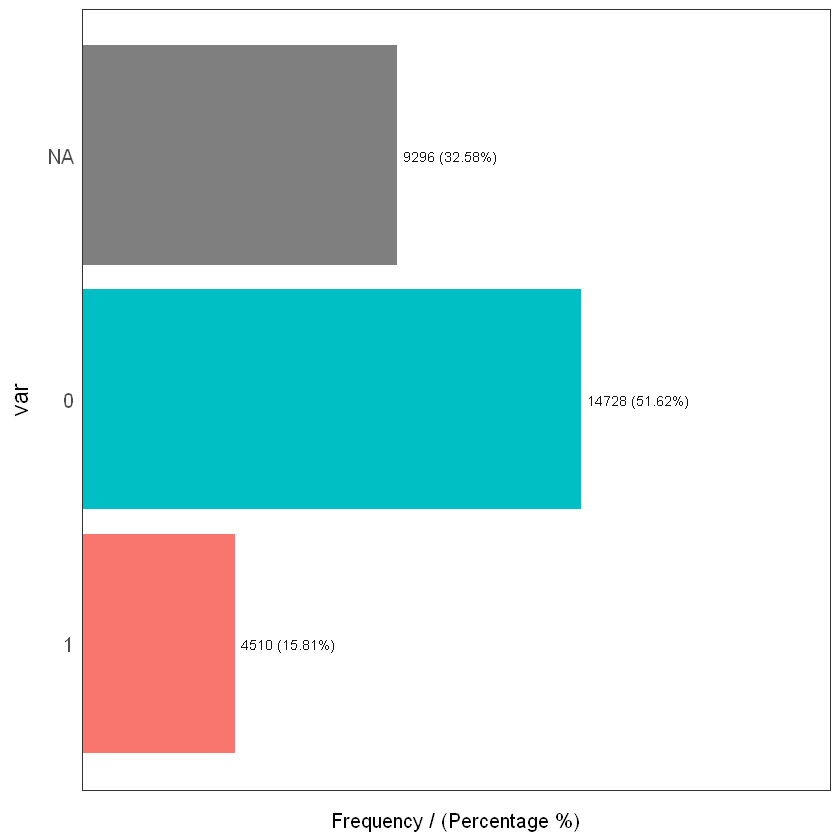

variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99,skewness,kurtosis,iqr,range_98,range_80
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
idcode,2601.2842924,1487.3589471,0.57177870,43.3300000,259.65000000,1327.000000,2606.000000,3881.000000,4889.000000,5101.000000,-0.017827225,1.808519,2554.0000000,"[43.33, 5101]","[518, 4656]"
year,77.9586458,6.3838786,0.08188801,68.0000000,69.00000000,72.000000,78.000000,83.000000,88.000000,88.000000,0.089047843,1.701219,11.0000000,"[68, 88]","[70, 87]"
birth_yr,48.0850915,3.0128372,0.06265637,42.0000000,43.00000000,46.000000,48.000000,51.000000,53.000000,53.000000,-0.119657031,2.013607,5.0000000,"[42, 53]","[44, 52]"
age,29.0451070,6.7005837,0.23069578,18.0000000,19.00000000,23.000000,28.000000,34.000000,41.000000,44.000000,0.264207579,2.089807,11.0000000,"[18, 44]","[21, 38]"
race,1.3033924,0.4822773,0.37001699,1.0000000,1.00000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.136579670,2.965488,1.0000000,"[1, 3]","[1, 2]"
msp,0.6029175,0.4893019,0.81155710,0.0000000,0.00000000,0.000000,1.000000,1.000000,1.000000,1.000000,-0.420677912,1.176970,1.0000000,"[0, 1]","[0, 1]"
nev_mar,0.2296795,0.4206341,1.83139584,0.0000000,0.00000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.285322563,2.652054,0.0000000,"[0, 1]","[0, 1]"
grade,12.5325950,2.3239053,0.18542890,7.0000000,9.00000000,12.000000,12.000000,14.000000,17.000000,18.000000,0.103780897,4.373761,2.0000000,"[7, 18]","[10, 16]"
collgrad,0.1680451,0.3739129,2.22507429,0.0000000,0.00000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.775604222,4.152770,0.0000000,"[0, 1]","[0, 1]"


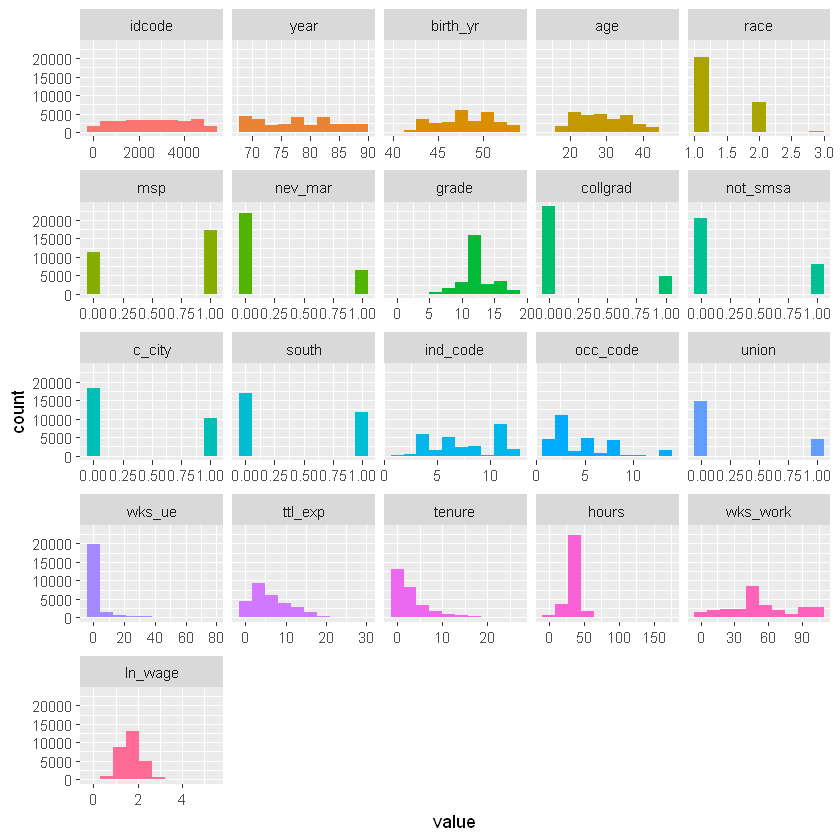

In [15]:
glimpse(nlswork)
status(nlswork)
freq(nlswork$union)
describe(nlswork)
plot_num(nlswork)
profiling_num(nlswork)